### Import Libraries

In [1]:
import xgboost as xgb
import lightgbm as lgb
from skopt import BayesSearchCV
from sklearn.model_selection import StratifiedKFold
from skopt.space import Real,Categorical,Integer

C:\Users\maryam\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\maryam\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\maryam\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

C:\Users\maryam\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import pip
import missingno as msno
from collections import Counter


In [4]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.preprocessing import MinMaxScaler



# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


##### Read Data

In [5]:
df=pd.read_csv("C:\\Users\\maryam\\Downloads\\Carlo Lisi\\RisklabDataCompetition\\data for participants.csv")

## Feature Analysis

In [6]:
df.head(5)

,Credit_Limit,Sex,Education,Marital_Status,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,Previous_Payment_Prior_Feb,...,Apr_Repay_Status,Previous_Payment_Prior_Apr,Apr_Statement,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement,July_Payment_Status
0,9600.0,1.0,3.0,3.0,32.0,6.0,110.0,138.0,5.0,2847.0,...,7.0,331.0,1080.0,12.0,535.0,1671.0,3.0,4800.0,6799.0,1.0
1,14400.0,2.0,3.0,2.0,30.0,-2.0,0.0,132.0,-2.0,0.0,...,-2.0,0.0,0.0,-2.0,45.0,0.0,-2.0,136.0,45.0,0.0
2,8100.0,1.0,1.0,2.0,29.0,-1.0,133.0,7.0,-1.0,1700.0,...,-1.0,751.0,-4.0,-1.0,498.0,747.0,-1.0,381.0,496.0,0.0
3,2700.0,2.0,2.0,1.0,31.0,0.0,104.0,2891.0,0.0,140.0,...,0.0,40.0,2842.0,0.0,60.0,1187.0,0.0,19.0,1153.0,0.0
4,14500.0,2.0,2.0,1.0,37.0,-2.0,309.0,403.0,-2.0,94.0,...,-2.0,362.0,381.0,-2.0,0.0,362.0,-2.0,116.0,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30602 entries, 0 to 30601
Data columns (total 24 columns):
Credit_Limit                  30602 non-null float64
Sex                           30601 non-null float64
Education                     30599 non-null float64
Marital_Status                30598 non-null float64
Age                           30595 non-null float64
Jan_Repay_Status              30597 non-null float64
Previous_Payment_Prior_Jan    30599 non-null float64
Jan_Statement                 30595 non-null float64
Feb_Repay_Status              30600 non-null float64
Previous_Payment_Prior_Feb    30597 non-null float64
Feb_Statement                 30595 non-null float64
Mar_Repay_Status              30599 non-null float64
Previous_Payment_Prior_Mar    30600 non-null float64
Mar_Statement                 30598 non-null float64
Apr_Repay_Status              30598 non-null float64
Previous_Payment_Prior_Apr    30599 non-null float64
Apr_Statement                 30599 non-nul

In [8]:
df.describe()

,Credit_Limit,Sex,Education,Marital_Status,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,Previous_Payment_Prior_Feb,...,Apr_Repay_Status,Previous_Payment_Prior_Apr,Apr_Statement,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement,July_Payment_Status
count,30602.000000,30601.000000,30599.000000,30598.000000,30595.000000,30597.000000,30599.000000,30595.000000,30600.000000,30597.000000,...,30598.000000,30599.000000,30599.000000,30601.000000,30598.000000,30599.000000,30600.000000,30600.000000,30597.000000,30601.000000
mean,6672.102712,1.600667,1.872349,1.560625,35.835921,0.069615,243.085297,2058.031084,-0.043595,252.887473,...,-0.123636,209.955619,1741.370045,-0.173393,208.100431,1626.891434,-0.197680,227.101667,1573.701213,0.225189
std,5165.664158,0.510355,0.816311,0.533208,10.142700,1.396863,697.377685,2936.812290,1.466934,941.932594,...,1.470158,662.602886,2566.962601,1.430435,643.601986,2430.148971,1.449626,745.095203,2385.559628,0.417948
min,200.000000,0.000000,0.000000,0.000000,14.000000,-2.000000,0.000000,-6623.000000,-2.000000,0.000000,...,-2.000000,0.000000,-6800.000000,-2.000000,0.000000,-3253.000000,-2.000000,0.000000,-13584.000000,0.000000
25%,2100.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,40.000000,147.000000,-1.000000,36.000000,...,-1.000000,12.000000,97.000000,-1.000000,12.000000,75.000000,-1.000000,7.000000,53.000000,0.000000
50%,5600.000000,2.000000,2.000000,2.000000,34.000000,0.000000,87.000000,914.000000,0.000000,82.000000,...,0.000000,61.000000,770.000000,0.000000,62.000000,734.000000,0.000000,60.000000,694.000000,0.000000
75%,9500.000000,2.000000,2.000000,2.000000,42.000000,0.000000,205.000000,2712.000000,0.000000,200.000000,...,0.000000,171.000000,2212.000000,0.000000,170.750000,2029.000000,0.000000,168.000000,1992.000000,0.000000
max,40100.000000,8.000000,6.000000,4.000000,102.000000,12.000000,34942.000000,38580.000000,12.000000,67370.000000,...,12.000000,24840.000000,35663.000000,12.000000,17061.000000,37087.000000,12.000000,21147.000000,38467.000000,2.000000


In [9]:
df.skew()

Credit_Limit                   1.000903
Sex                           -0.121720
Education                      1.032497
Marital_Status                 0.073694
Age                            1.213690
Jan_Repay_Status               2.618346
Previous_Payment_Prior_Jan    12.999641
Jan_Statement                  2.645478
Feb_Repay_Status               2.445304
Previous_Payment_Prior_Feb    28.212977
Feb_Statement                  2.685062
Mar_Repay_Status               2.540738
Previous_Payment_Prior_Mar    15.413924
Mar_Statement                  3.059001
Apr_Repay_Status               2.767552
Previous_Payment_Prior_Apr    11.468868
Apr_Statement                  2.798272
May_Repay_Status               2.880160
Previous_Payment_Prior_May     9.967769
May_Statement                  2.839645
Jun_Repay_Status               2.835747
Previous_Payment_Prior_Jun     9.578048
Jun_Statement                  2.798760
July_Payment_Status            1.319903
dtype: float64

#### Dealing with duplicates

In [10]:
df[df.duplicated()]

,Credit_Limit,Sex,Education,Marital_Status,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,Previous_Payment_Prior_Feb,...,Apr_Repay_Status,Previous_Payment_Prior_Apr,Apr_Statement,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement,July_Payment_Status
9607,14400.0,1.0,1.0,2.0,27.0,-2.0,0.0,0.0,-2.0,0.0,...,-2.0,0.0,0.0,-2.0,0.0,0.0,-2.0,0.0,0.0,0.0
12182,3200.0,2.0,2.0,1.0,32.0,-2.0,0.0,0.0,-2.0,0.0,...,-2.0,0.0,0.0,-2.0,0.0,0.0,-2.0,0.0,0.0,0.0
13670,4100.0,1.0,2.0,2.0,27.0,0.0,200.0,4018.0,0.0,320.0,...,0.0,140.0,3976.0,0.0,39.0,3824.0,-1.0,0.0,39.0,0.0
15789,1200.0,2.0,2.0,1.0,32.0,3.0,0.0,96.0,2.0,0.0,...,7.0,0.0,96.0,7.0,0.0,96.0,7.0,0.0,96.0,1.0
16053,2100.0,2.0,3.0,1.0,51.0,2.0,88.0,1935.0,0.0,84.0,...,0.0,0.0,2042.0,2.0,80.0,2006.0,0.0,80.0,1928.0,1.0
21408,14400.0,2.0,1.0,2.0,29.0,-1.0,181.0,71.0,-1.0,588.0,...,0.0,86.0,427.0,-1.0,51.0,79.0,-1.0,963.0,51.0,0.0
22211,20000.0,2.0,2.0,2.0,29.0,0.0,323.0,9398.0,0.0,296.0,...,0.0,154.0,5647.0,0.0,145.0,5214.0,0.0,137.0,5057.0,0.0
22246,1100.0,2.0,2.0,2.0,32.0,0.0,57.0,1179.0,0.0,63.0,...,0.0,32.0,1155.0,0.0,29.0,1171.0,0.0,73.0,920.0,1.0
24094,8100.0,2.0,1.0,1.0,32.0,1.0,0.0,0.0,-2.0,0.0,...,-2.0,0.0,0.0,-2.0,0.0,0.0,-2.0,0.0,0.0,0.0
26127,7900.0,2.0,1.0,1.0,36.0,1.0,0.0,0.0,-2.0,0.0,...,-2.0,0.0,0.0,-2.0,0.0,0.0,-2.0,0.0,0.0,0.0


In [11]:
df.drop_duplicates(keep = 'first', inplace = True)

#### Dealing with Missing Values

In [12]:
df.isnull().sum()

Credit_Limit                  0
Sex                           1
Education                     3
Marital_Status                4
Age                           7
Jan_Repay_Status              5
Previous_Payment_Prior_Jan    3
Jan_Statement                 7
Feb_Repay_Status              2
Previous_Payment_Prior_Feb    5
Feb_Statement                 7
Mar_Repay_Status              3
Previous_Payment_Prior_Mar    2
Mar_Statement                 4
Apr_Repay_Status              4
Previous_Payment_Prior_Apr    3
Apr_Statement                 3
May_Repay_Status              1
Previous_Payment_Prior_May    4
May_Statement                 3
Jun_Repay_Status              2
Previous_Payment_Prior_Jun    2
Jun_Statement                 5
July_Payment_Status           1
dtype: int64

,Total,Percent
Age,7,0.000229
Jan_Statement,7,0.000229
Feb_Statement,7,0.000229
Jan_Repay_Status,5,0.000163
Previous_Payment_Prior_Feb,5,0.000163


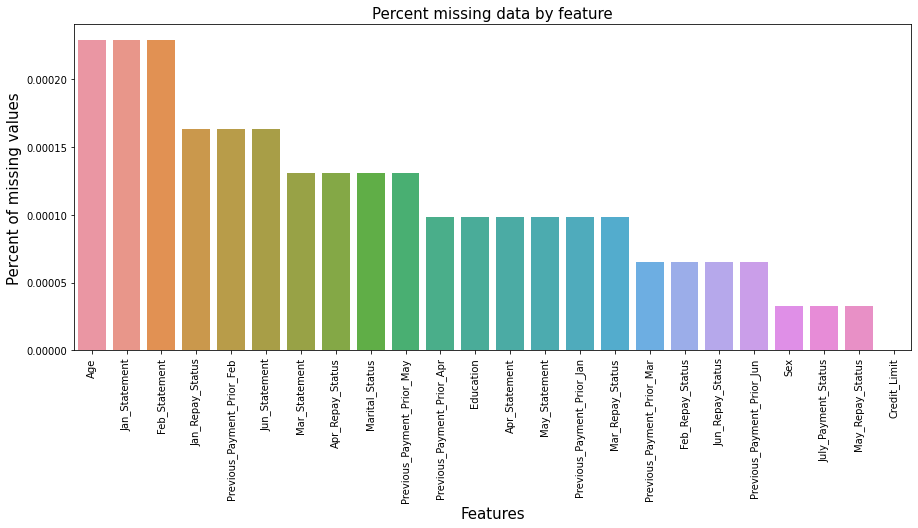

In [13]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

#### Filling NA

#### Using mode for fill NA in categorical variables

In [14]:
D=['Education','Sex','Marital_Status','Jan_Repay_Status','Feb_Repay_Status','Mar_Repay_Status',
 'Apr_Repay_Status','May_Repay_Status','Jun_Repay_Status','July_Payment_Status']

In [15]:
for d in D:
    df[d].fillna(df[d].mode()[0], inplace=True)

#### Using Mean for fill NA in numerical variables

In [16]:
G=['Previous_Payment_Prior_Jan', 'Previous_Payment_Prior_Feb', 'Previous_Payment_Prior_Mar','Previous_Payment_Prior_Apr'
  ,'Previous_Payment_Prior_May','Previous_Payment_Prior_Jun','Jan_Statement','Feb_Statement','Mar_Statement','Apr_Statement'
  ,'May_Statement','Jun_Statement','Age']

In [17]:
for g in G:
    df[g].fillna(df[g].mean(), inplace=True)

In [18]:
df.isna().sum()

Credit_Limit                  0
Sex                           0
Education                     0
Marital_Status                0
Age                           0
Jan_Repay_Status              0
Previous_Payment_Prior_Jan    0
Jan_Statement                 0
Feb_Repay_Status              0
Previous_Payment_Prior_Feb    0
Feb_Statement                 0
Mar_Repay_Status              0
Previous_Payment_Prior_Mar    0
Mar_Statement                 0
Apr_Repay_Status              0
Previous_Payment_Prior_Apr    0
Apr_Statement                 0
May_Repay_Status              0
Previous_Payment_Prior_May    0
May_Statement                 0
Jun_Repay_Status              0
Previous_Payment_Prior_Jun    0
Jun_Statement                 0
July_Payment_Status           0
dtype: int64

#### Removing rows with target equal 2

In [19]:
df['July_Payment_Status'].value_counts()

0.0    23702
1.0     6880
2.0        3
Name: July_Payment_Status, dtype: int64

In [20]:
df[df['July_Payment_Status']==2]

,Credit_Limit,Sex,Education,Marital_Status,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,Previous_Payment_Prior_Feb,...,Apr_Repay_Status,Previous_Payment_Prior_Apr,Apr_Statement,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement,July_Payment_Status
3356,1300.0,2.0,1.0,1.0,51.0,-1.0,58.0,97.0,9.0,134.0,...,12.0,379.000000,440.0,1.0,72.0,1627.154895,5.0,352.0,389.0,2.0
6446,8100.0,2.0,3.0,1.0,84.0,4.0,679.0,3131.0,10.0,214.0,...,3.0,210.048394,113.0,8.0,64.0,117.000000,3.0,1576.0,7240.0,2.0
26975,6600.0,2.0,4.0,1.0,70.0,0.0,3466.0,5299.0,7.0,322.0,...,12.0,983.000000,1274.0,6.0,1459.0,2321.000000,9.0,4828.0,5323.0,2.0


In [21]:
df=df.drop([26975,6446,3356],axis=0)

In [22]:
df['July_Payment_Status'].value_counts()

0.0    23702
1.0     6880
Name: July_Payment_Status, dtype: int64

## Visualizing

In [23]:
Paid = df[df['July_Payment_Status']==0]


In [24]:
Not_Paid = df[df['July_Payment_Status']==1]

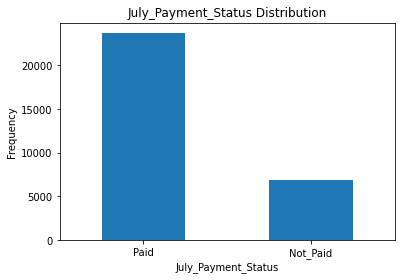

In [25]:
LABELS = ["Paid","Not_Paid"]

count_classes = pd.value_counts(df['July_Payment_Status'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("July_Payment_Status Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("July_Payment_Status")
plt.ylabel("Frequency");

In [26]:
Paid.shape

(23702, 24)

In [27]:
b1=['Previous_Payment_Prior_Jan','Jan_Statement','July_Payment_Status']
b2=['Previous_Payment_Prior_Mar','Mar_Statement','July_Payment_Status']
b3=['Previous_Payment_Prior_Feb','Feb_Statement','July_Payment_Status']
b4=['Previous_Payment_Prior_May','May_Statement','July_Payment_Status']
b5=['Previous_Payment_Prior_Apr','Apr_Statement','July_Payment_Status']
b6=['Previous_Payment_Prior_Jun','Jun_Statement','July_Payment_Status']
b7=['Age','Credit_Limit','July_Payment_Status']

In [28]:
def s(p):
    a=df[p]
    b=(a - a.mean()) / (a.std()) 
    return b

In [29]:
def f(u):
    a=s(u)
    plt.figure(figsize=(10,10))
    return sns.violinplot(x="features", y="value", hue="July_Payment_Status", data=pd.melt(a,id_vars="July_Payment_Status",var_name="features", value_name='value'),split=True, inner="quart")

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


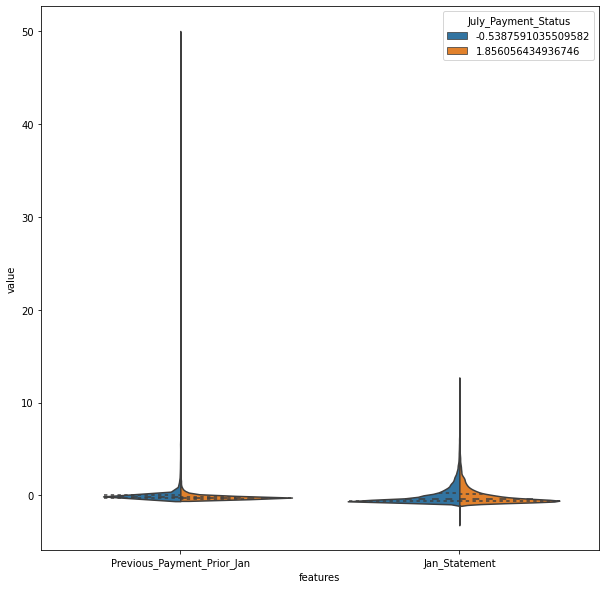

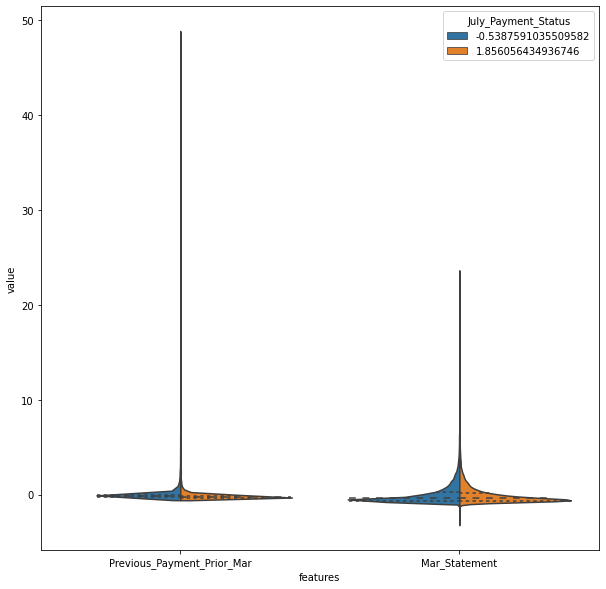

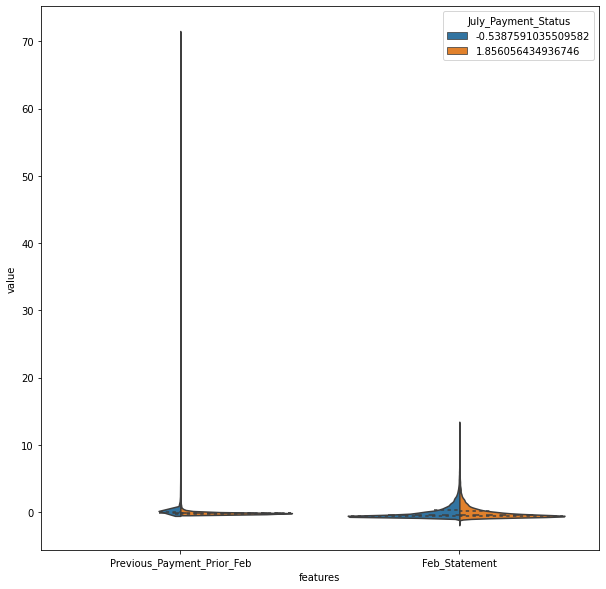

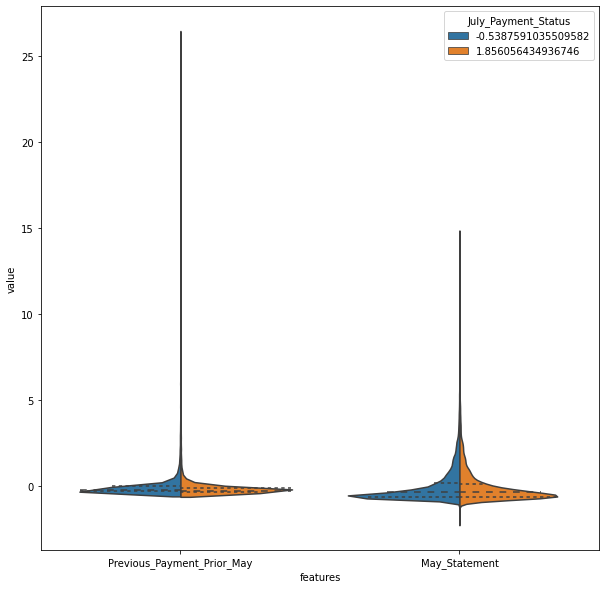

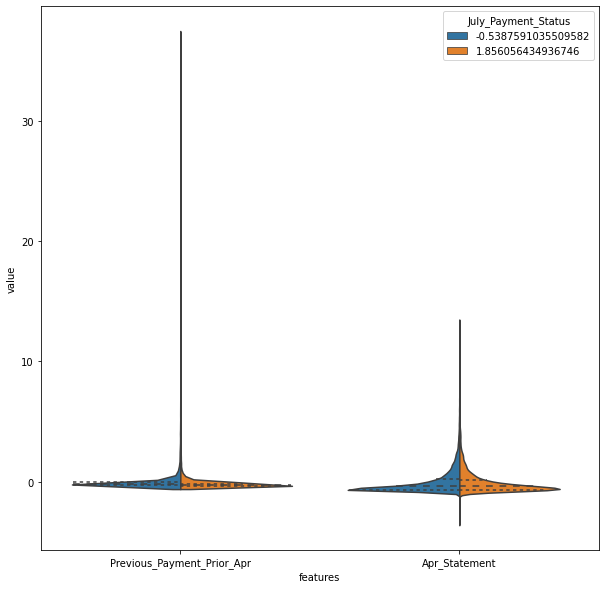

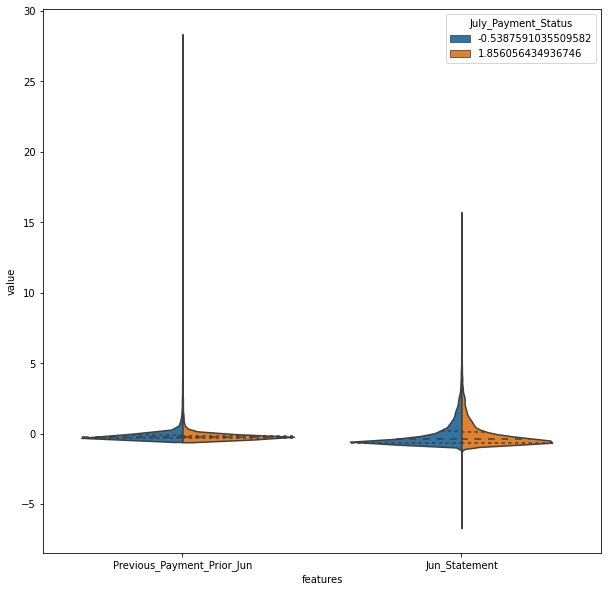

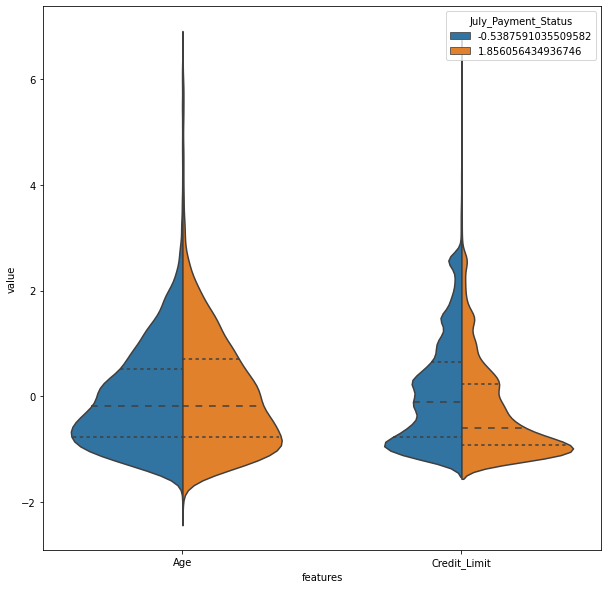

In [30]:
b=[b1,b2,b3,b4,b5,b6,b7]
for c in b:
    print(f(c))

In [31]:
def w(p):
    a=df[p] 
    a["July_Payment_Status"].replace([0,1], ["Paid", "Not-Paid"], inplace=True)
    v=pd.melt(a[:1000],id_vars="July_Payment_Status",var_name="features", value_name="value")
    plt.figure(figsize=(10,10))
    return sns.boxplot(x="features", y="value", hue="July_Payment_Status",data=v)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


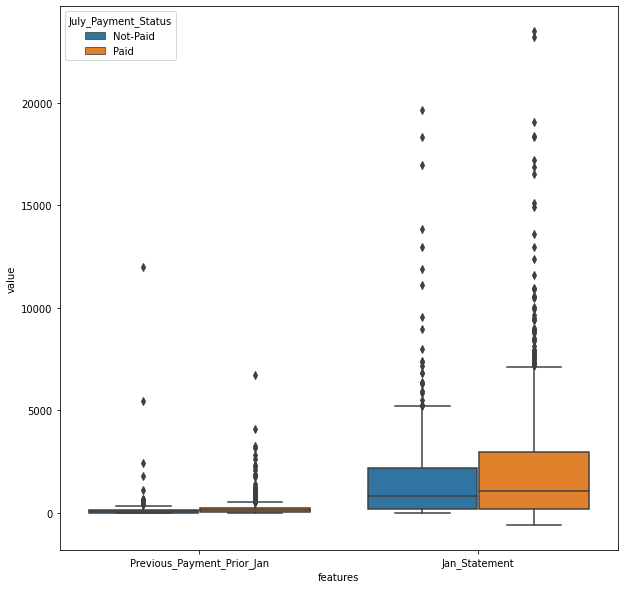

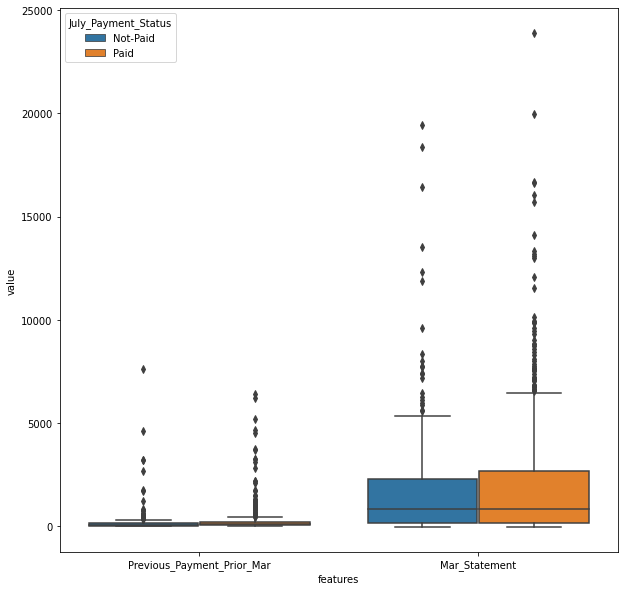

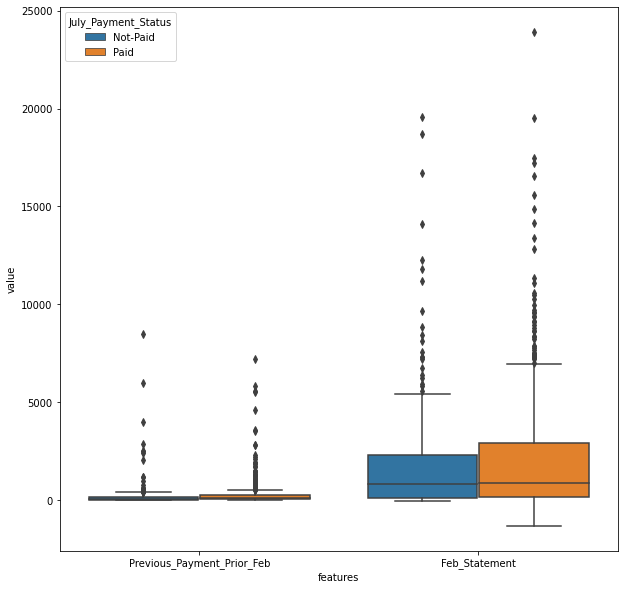

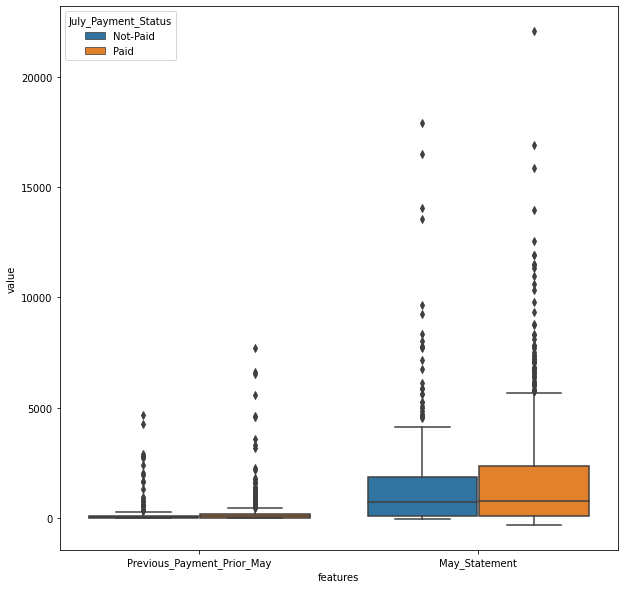

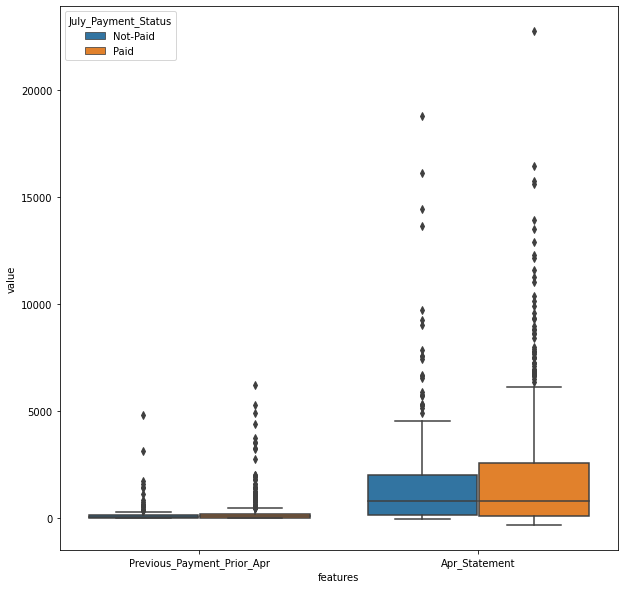

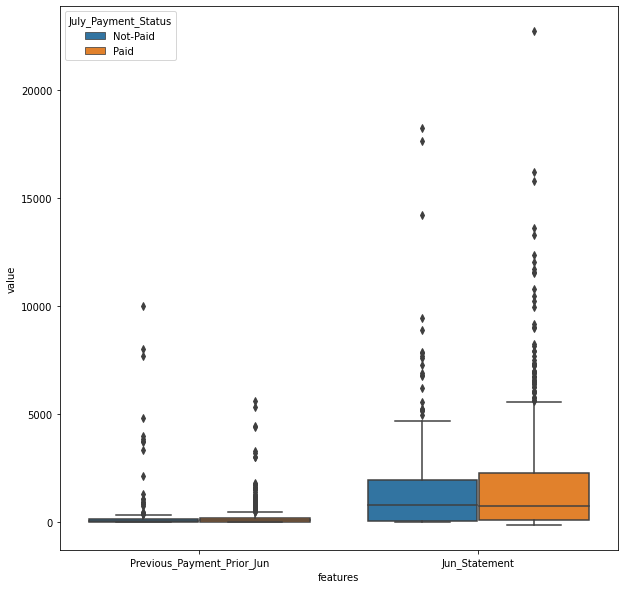

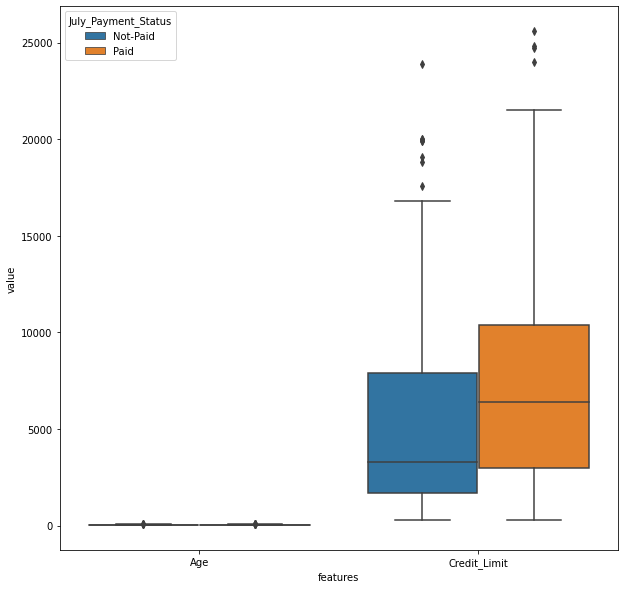

In [32]:
b=[b1,b2,b3,b4,b5,b6,b7]
for c in b:
    print(w(c))

In [33]:
def t(p):
    a=df[p] 
    a["July_Payment_Status"].replace([0,1], ["Paid", "Not-Paid"], inplace=True)
    v=pd.melt(a[:1000],id_vars="July_Payment_Status",var_name="features", value_name="value")
    plt.figure(figsize=(10,10))
    return sns.stripplot(x="features", y="value", hue="July_Payment_Status",data=v)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


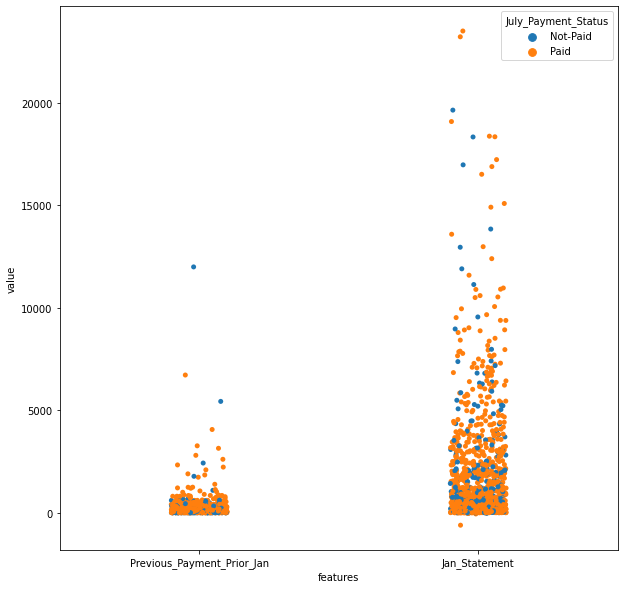

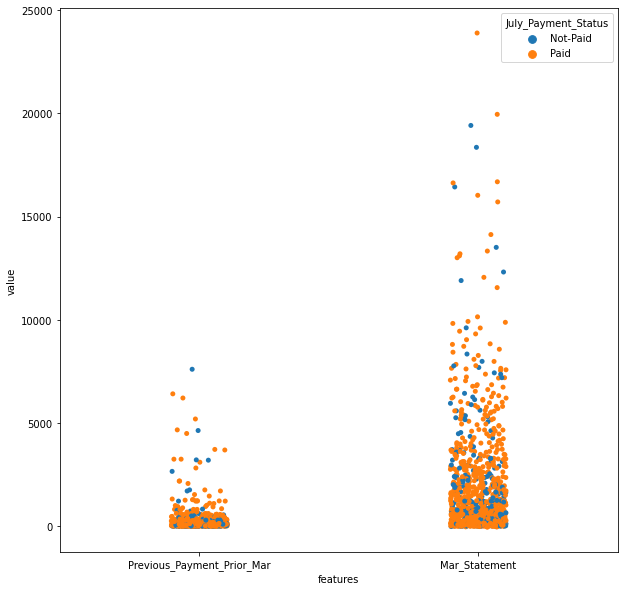

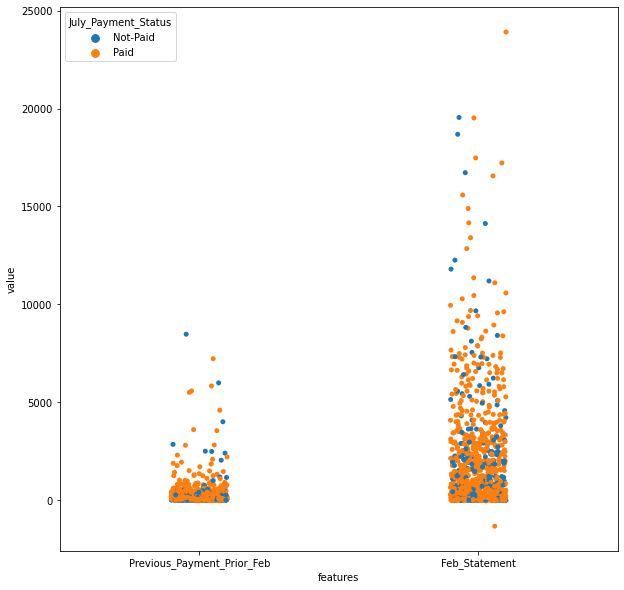

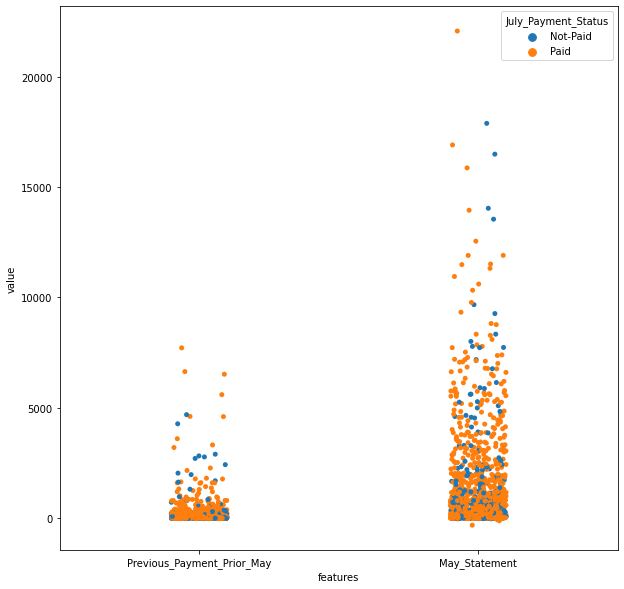

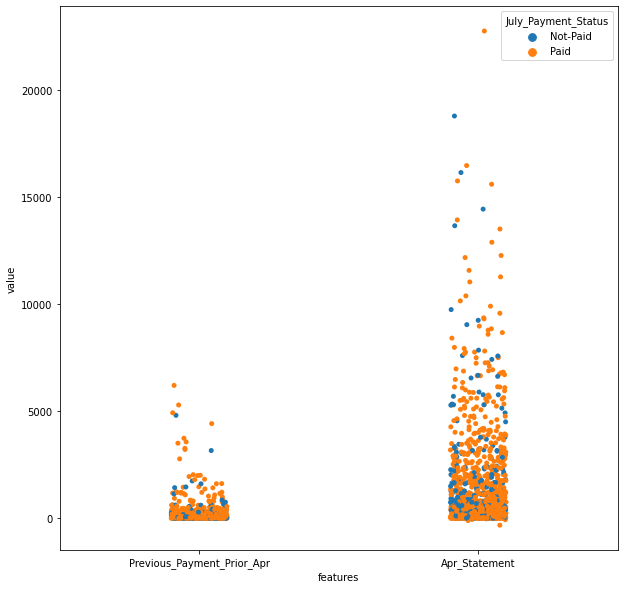

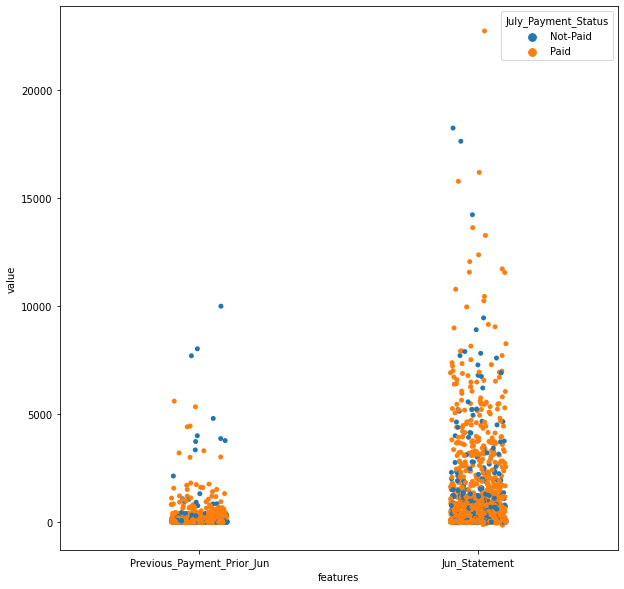

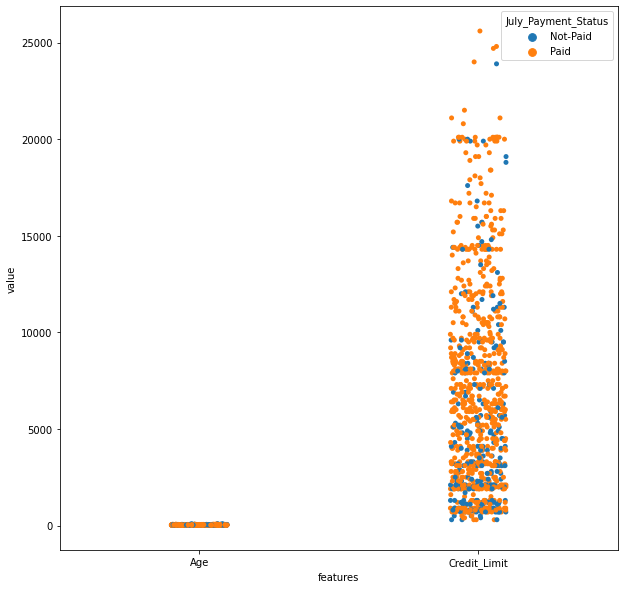

In [34]:
b=[b1,b2,b3,b4,b5,b6,b7]
for c in b:
    print(t(c))

In [35]:
def o(p):
    a=df[p] 
    a["July_Payment_Status"].replace([0,1], ["Paid", "Not-Paid"], inplace=True)
    plt.figure(figsize=(10,10))
    return sns.pairplot(a[:1000],hue="July_Payment_Status")

<Figure size 720x720 with 0 Axes>

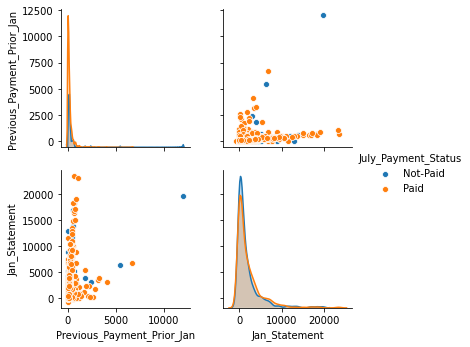

<Figure size 720x720 with 0 Axes>

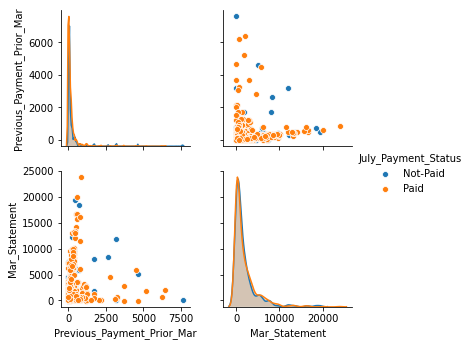

<Figure size 720x720 with 0 Axes>

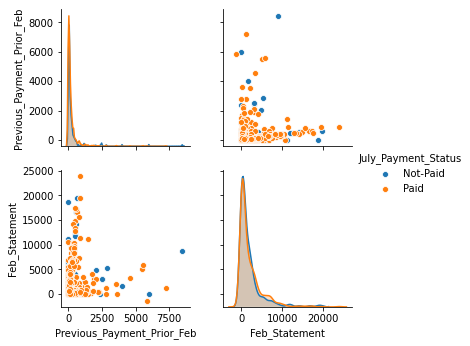

<Figure size 720x720 with 0 Axes>

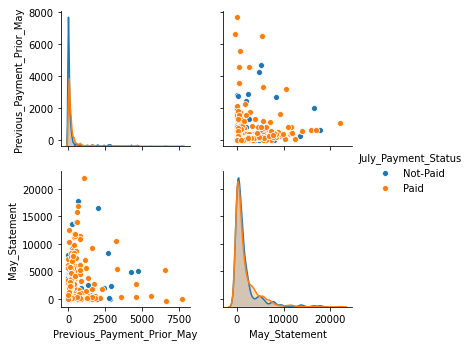

<Figure size 720x720 with 0 Axes>

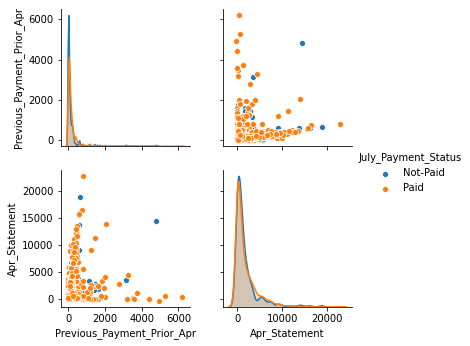

<Figure size 720x720 with 0 Axes>

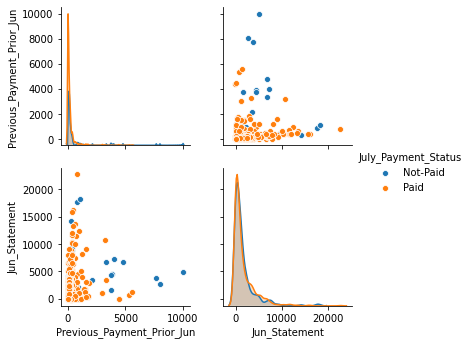

<Figure size 720x720 with 0 Axes>

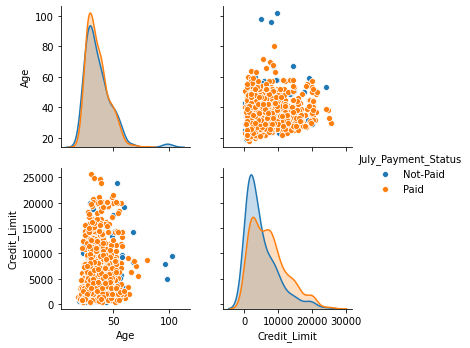

In [36]:
b=[b1,b2,b3,b4,b5,b6,b7]
for c in b:
    print(o(c))

##### Age and July_Payment_Status

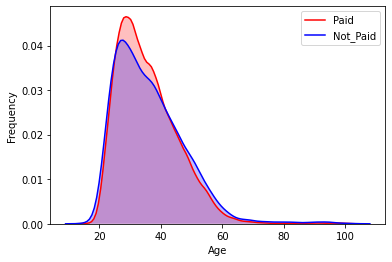

In [37]:
g = sns.kdeplot(df["Age"][(df["July_Payment_Status"] == 0) & (df["Age"].notnull())], color="Red",shade=True)
g = sns.kdeplot(df["Age"][(df["July_Payment_Status"] == 1) & (df["Age"].notnull())], color="Blue",shade=True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Paid","Not_Paid"])

##### Credit_Limit and July_Payment_Status

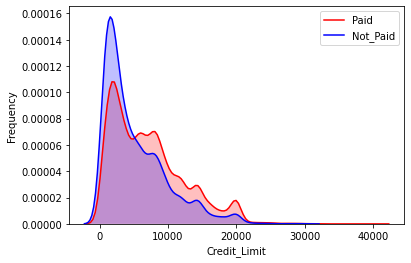

In [38]:
g = sns.kdeplot(df["Credit_Limit"][(df["July_Payment_Status"] == 0) & (df["Credit_Limit"].notnull())], color="Red",shade=True)
g = sns.kdeplot(df["Credit_Limit"][(df["July_Payment_Status"] == 1) & (df["Credit_Limit"].notnull())], color="Blue",shade=True)
g.set_xlabel("Credit_Limit")
g.set_ylabel("Frequency")
g = g.legend(["Paid","Not_Paid"])

##### Previous_Payment_Prior_Jan and July_Payment_Status

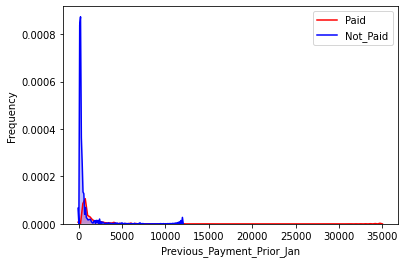

In [39]:
g = sns.kdeplot(df["Previous_Payment_Prior_Jan"][(df["July_Payment_Status"] == 0) & (df["Previous_Payment_Prior_Jan"].notnull())], color="Red",shade=True)
g = sns.kdeplot(df["Previous_Payment_Prior_Jan"][(df["July_Payment_Status"] == 1) & (df["Previous_Payment_Prior_Jan"].notnull())], color="Blue",shade=True)
g.set_xlabel("Previous_Payment_Prior_Jan")
g.set_ylabel("Frequency")
g = g.legend(["Paid","Not_Paid"])

##### Jan_Statement and July_Payment_Status

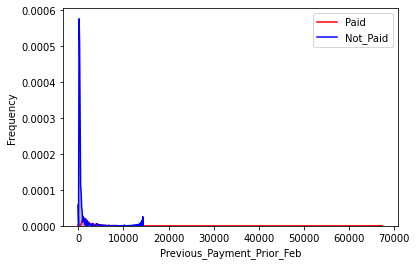

In [40]:
g = sns.kdeplot(df["Previous_Payment_Prior_Feb"][(df["July_Payment_Status"] == 0) & (df["Previous_Payment_Prior_Feb"].notnull())], color="Red",shade=True)
g = sns.kdeplot(df["Previous_Payment_Prior_Feb"][(df["July_Payment_Status"] == 1) & (df["Previous_Payment_Prior_Feb"].notnull())], color="Blue",shade=True)
g.set_xlabel("Previous_Payment_Prior_Feb")
g.set_ylabel("Frequency")
g = g.legend(["Paid","Not_Paid"])

#### Education and July_Payment_Status

In [41]:
df["Education"] = df["Education"].replace([0,4,5,6],2)

In [42]:
df["Education"].value_counts()

2.0    14821
1.0    10703
3.0     5058
Name: Education, dtype: int64

In [43]:
df[['Education', 'July_Payment_Status']].groupby("Education").mean()

,July_Payment_Status
Education,
1.0,0.195085
2.0,0.235747
3.0,0.256623


In [44]:
df["Education"] = df["Education"].replace([1,2,3],[0.195,0.235,.256])

In [45]:
df['Education'].value_counts()

0.235    14821
0.195    10703
0.256     5058
Name: Education, dtype: int64

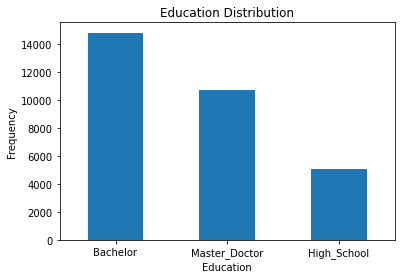

In [46]:
LABELS = ["Bachelor","Master_Doctor","High_School"]

count_classes = pd.value_counts(df['Education'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Education Distribution")
plt.xticks(range(3), LABELS)
plt.xlabel("Education")
plt.ylabel("Frequency");

([<matplotlib.axis.XTick at 0x24bd956f128>,
 [Text(0, 0, 'Master_Doctorial'),
  Text(0, 0, 'Bachelor'),
  Text(0, 0, 'High_School')])

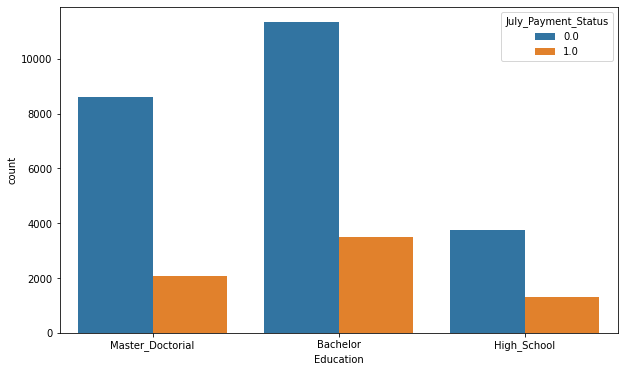

In [47]:
LABELS = ["Master_Doctorial","Bachelor","High_School"]
plt.figure(figsize=(10,6))
sns.countplot(x="Education",data=df, hue='July_Payment_Status')
plt.xticks(range(3), LABELS)

#### Marital Status and July_Payment_Status

In [48]:
df['Marital_Status']=df['Marital_Status'].replace([0,3,4],2)

In [49]:
df['Marital_Status'].value_counts()

2.0    16738
1.0    13844
Name: Marital_Status, dtype: int64

In [50]:
df[['Marital_Status', 'July_Payment_Status']].groupby("Marital_Status").mean()

,July_Payment_Status
Marital_Status,
1.0,0.236565
2.0,0.215378


In [51]:
df['Marital_Status']=df['Marital_Status'].replace([1,2],[.236,.215])

In [52]:
df['Marital_Status'].value_counts()

0.215    16738
0.236    13844
Name: Marital_Status, dtype: int64

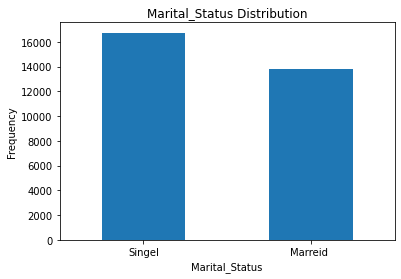

In [53]:
LABELS = ["Singel","Marreid "]

count_classes = pd.value_counts(df['Marital_Status'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Marital_Status Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Marital_Status")
plt.ylabel("Frequency");

([<matplotlib.axis.XTick at 0x24bda5db6a0>,
 [Text(0, 0, 'Singel'), Text(0, 0, 'Marreid ')])

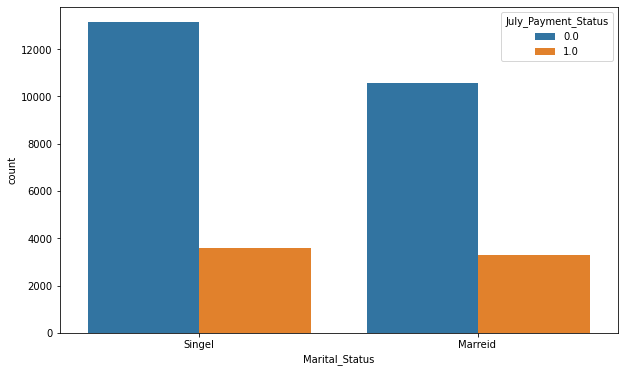

In [54]:
LABELS = ["Singel","Marreid "]
plt.figure(figsize=(10,6))
sns.countplot(x="Marital_Status",data=df, hue="July_Payment_Status")
plt.xticks(range(2), LABELS)

#### Sex and July_Payment_Status

In [55]:
df['Sex']=df['Sex'].replace([0,3,4,5,6,7,8],2)

In [56]:
df[['Sex', 'July_Payment_Status']].groupby("Sex").mean()

,July_Payment_Status
Sex,
1.0,0.245146
2.0,0.211754


In [57]:
df['Sex']=df['Sex'].replace([1,2],[.245,.212])

In [58]:
df['Sex'].value_counts()

0.212    18479
0.245    12103
Name: Sex, dtype: int64

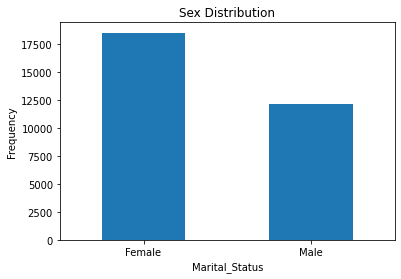

In [59]:
LABELS = ["Female","Male"]

count_classes = pd.value_counts(df['Sex'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Sex Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Marital_Status")
plt.ylabel("Frequency");

([<matplotlib.axis.XTick at 0x24bda69c048>,
 [Text(0, 0, 'Female'), Text(0, 0, 'Male')])

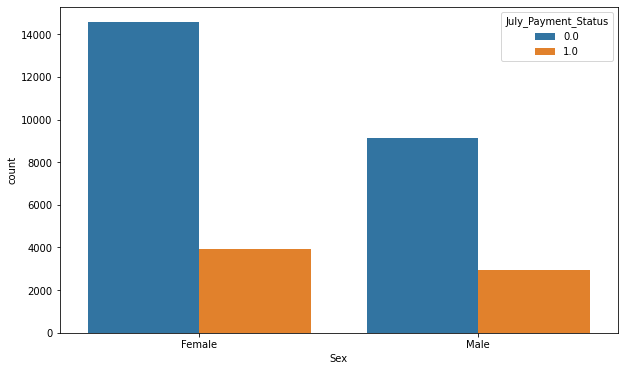

In [60]:
plt.figure(figsize=(10,6))
sns.countplot(x="Sex",data=df, hue="July_Payment_Status")
plt.xticks(range(2), LABELS)

### Apr_Repay_Status and July_Payment_Status

In [61]:
df['Apr_Repay_Status']=df['Apr_Repay_Status'].replace([-2],-1)
df['Apr_Repay_Status']=df['Apr_Repay_Status'].replace([1,3,4,5,6,7,8,9,10,11,12],2)

In [62]:
df[['Apr_Repay_Status', 'July_Payment_Status']].groupby("Apr_Repay_Status").mean()

,July_Payment_Status
Apr_Repay_Status,
-1.0,0.173693
0.0,0.183912
2.0,0.527434


In [63]:
df['Apr_Repay_Status']=df['Apr_Repay_Status'].replace([-1,0,2],[.173,.183,.527])

In [64]:
df['Apr_Repay_Status'].value_counts()

0.183    16546
0.173    10081
0.527     3955
Name: Apr_Repay_Status, dtype: int64

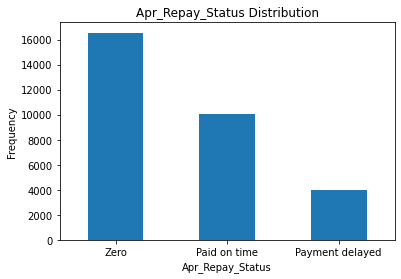

In [65]:
LABELS = ["Zero","Paid on time","Payment delayed"]

count_classes = pd.value_counts(df['Apr_Repay_Status'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Apr_Repay_Status Distribution")
plt.xticks(range(3), LABELS)
plt.xlabel("Apr_Repay_Status")
plt.ylabel("Frequency");

([<matplotlib.axis.XTick at 0x24bda76f320>,
 [Text(0, 0, 'Paid on time'),
  Text(0, 0, 'Zero'),
  Text(0, 0, 'Payment delayed')])

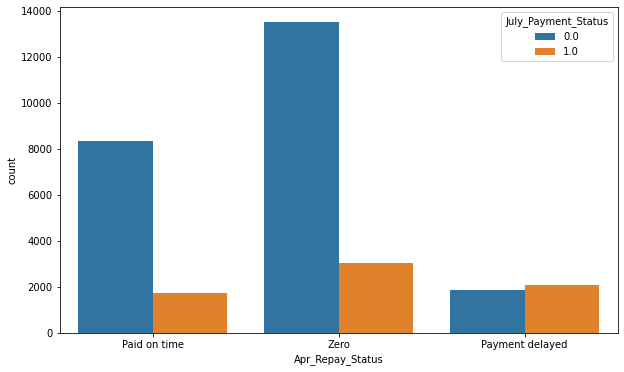

In [66]:
LABELS = ["Paid on time","Zero","Payment delayed"]
plt.figure(figsize=(10,6))
sns.countplot(x="Apr_Repay_Status",data=df, hue="July_Payment_Status")
plt.xticks(range(3), LABELS)

#### Jan_Repay_Status and July_Payment_Status

In [67]:
df['Jan_Repay_Status']=df['Jan_Repay_Status'].replace([-2],-1)
df['Jan_Repay_Status']=df['Jan_Repay_Status'].replace([2,3,4,5,6,7,8,9,10,11,12],1)

In [68]:
df[['Jan_Repay_Status', 'July_Payment_Status']].groupby("Jan_Repay_Status").mean()

,July_Payment_Status
Jan_Repay_Status,
-1.0,0.157239
0.0,0.129132
1.0,0.500069


In [69]:
df['Jan_Repay_Status']=df['Jan_Repay_Status'].replace([-1,0,1],[.157,.129,.500])

In [70]:
df['Jan_Repay_Status'].value_counts()

0.129    14822
0.157     8503
0.500     7257
Name: Jan_Repay_Status, dtype: int64

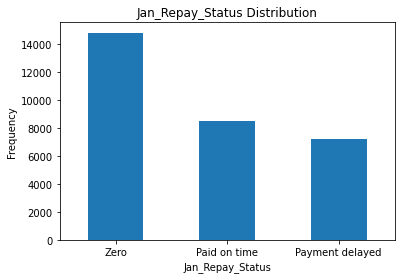

In [71]:
LABELS = ["Zero","Paid on time","Payment delayed"]

count_classes = pd.value_counts(df['Jan_Repay_Status'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Jan_Repay_Status Distribution")
plt.xticks(range(3), LABELS)
plt.xlabel("Jan_Repay_Status")
plt.ylabel("Frequency");

([<matplotlib.axis.XTick at 0x24bda842fd0>,
 [Text(0, 0, 'Zero'),
  Text(0, 0, 'Paid on time'),
  Text(0, 0, 'Payment delayed')])

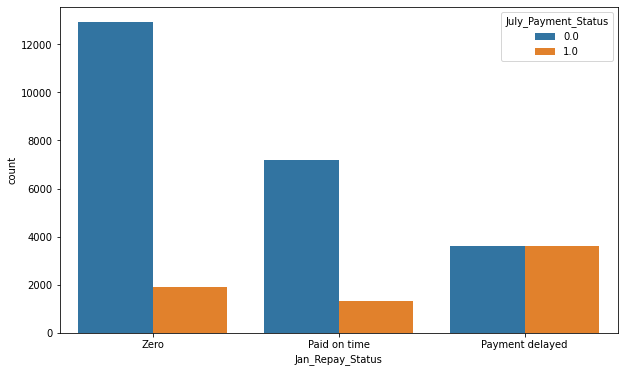

In [72]:
plt.figure(figsize=(10,6))
sns.countplot(x="Jan_Repay_Status",data=df, hue="July_Payment_Status")
plt.xticks(range(3), LABELS)

#### Feb_Repay_Status and July_Payment_Status

In [73]:
df['Feb_Repay_Status']=df['Feb_Repay_Status'].replace([-2],-1)
df['Feb_Repay_Status']=df['Feb_Repay_Status'].replace([1,3,4,5,6,7,8,9,10,11,12],2)

In [74]:
df[['Feb_Repay_Status', 'July_Payment_Status']].groupby("Feb_Repay_Status").mean()

,July_Payment_Status
Feb_Repay_Status,
-1.0,0.169229
0.0,0.159702
2.0,0.549498


In [75]:
df['Feb_Repay_Status']=df['Feb_Repay_Status'].replace([-1,0,2],[.169,.159,.549])

In [76]:
df['Feb_Repay_Status'].value_counts()

0.159    15817
0.169     9886
0.549     4879
Name: Feb_Repay_Status, dtype: int64

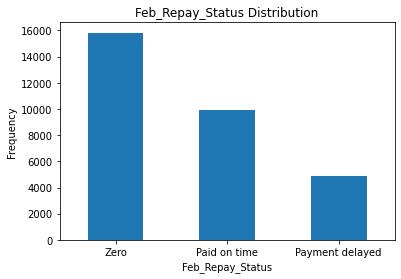

In [77]:
LABELS = ["Zero","Paid on time","Payment delayed"]

count_classes = pd.value_counts(df['Feb_Repay_Status'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Feb_Repay_Status Distribution")
plt.xticks(range(3), LABELS)
plt.xlabel("Feb_Repay_Status")
plt.ylabel("Frequency");

([<matplotlib.axis.XTick at 0x24bda91a470>,
 [Text(0, 0, 'Zero'),
  Text(0, 0, 'Paid on time'),
  Text(0, 0, 'Payment delayed')])

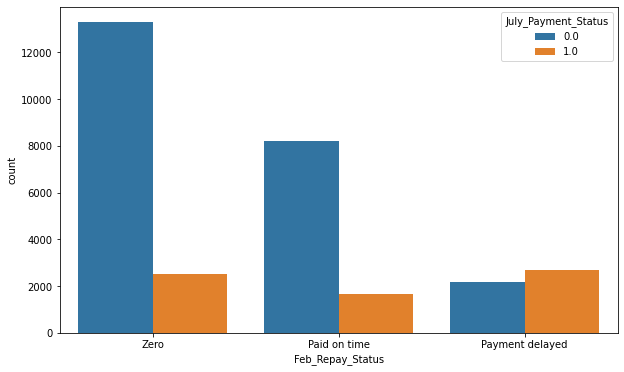

In [78]:
plt.figure(figsize=(10,6))
sns.countplot(x="Feb_Repay_Status",data=df, hue="July_Payment_Status")
plt.xticks(range(3), LABELS)

#### Mar_Repay_Status and July_Payment_Status

In [79]:
df['Mar_Repay_Status']=df['Mar_Repay_Status'].replace([-2],-1)
df['Mar_Repay_Status']=df['Mar_Repay_Status'].replace([1,3,4,5,6,7,8,9,10,11,12],2)

In [80]:
df[['Mar_Repay_Status', 'July_Payment_Status']].groupby("Mar_Repay_Status").mean()

,July_Payment_Status
Mar_Repay_Status,
-1.0,0.168270
0.0,0.175195
2.0,0.519119


In [81]:

df['Mar_Repay_Status']=df['Mar_Repay_Status'].replace([-1,0,2],[.168,.175,.519])

In [82]:
df['Mar_Repay_Status'].value_counts()

0.175    15868
0.168    10085
0.519     4629
Name: Mar_Repay_Status, dtype: int64

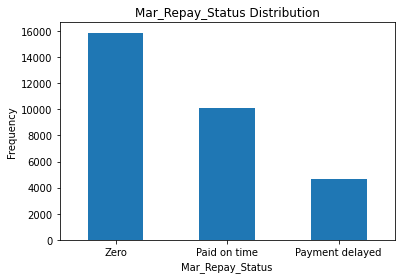

In [83]:
LABELS = ["Zero","Paid on time","Payment delayed"]

count_classes = pd.value_counts(df['Mar_Repay_Status'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Mar_Repay_Status Distribution")
plt.xticks(range(3), LABELS)
plt.xlabel("Mar_Repay_Status")
plt.ylabel("Frequency");

([<matplotlib.axis.XTick at 0x24bda9fecf8>,
 [Text(0, 0, 'Paid on time'),
  Text(0, 0, 'Zero'),
  Text(0, 0, 'Payment delayed')])

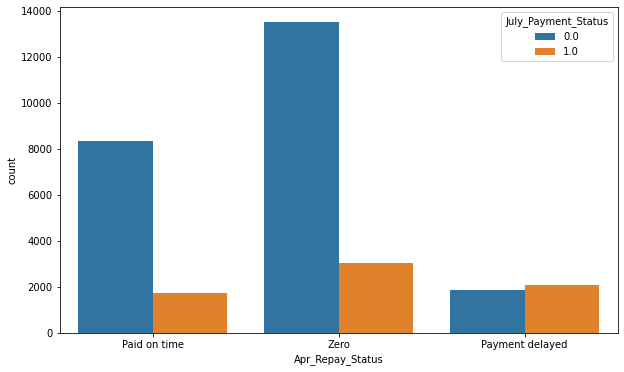

In [84]:
LABELS = ["Paid on time","Zero","Payment delayed"]
plt.figure(figsize=(10,6))
sns.countplot(x="Apr_Repay_Status",data=df, hue="July_Payment_Status")
plt.xticks(range(3), LABELS)

#### May_Repay_Status and July_Payment_Status

In [85]:
df['May_Repay_Status']=df['May_Repay_Status'].replace([-2],-1)
df['May_Repay_Status']=df['May_Repay_Status'].replace([1,3,4,5,6,7,8,9,10,11,12],2)

In [86]:
df[['May_Repay_Status', 'July_Payment_Status']].groupby("May_Repay_Status").mean()

,July_Payment_Status
May_Repay_Status,
-1.0,0.177990
0.0,0.189048
2.0,0.544813


In [87]:

df['May_Repay_Status']=df['May_Repay_Status'].replace([-1,0,2],[.177,.189,.544])

In [88]:
df['May_Repay_Status'].value_counts()

0.189    17038
0.177    10141
0.544     3403
Name: May_Repay_Status, dtype: int64

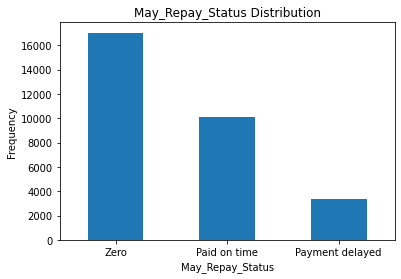

In [89]:
LABELS = ["Zero","Paid on time","Payment delayed"]

count_classes = pd.value_counts(df['May_Repay_Status'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("May_Repay_Status Distribution")
plt.xticks(range(3), LABELS)
plt.xlabel("May_Repay_Status")
plt.ylabel("Frequency");

([<matplotlib.axis.XTick at 0x24bdaac5dd8>,
 [Text(0, 0, 'Paid on time'),
  Text(0, 0, 'Zero'),
  Text(0, 0, 'Payment delayed')])

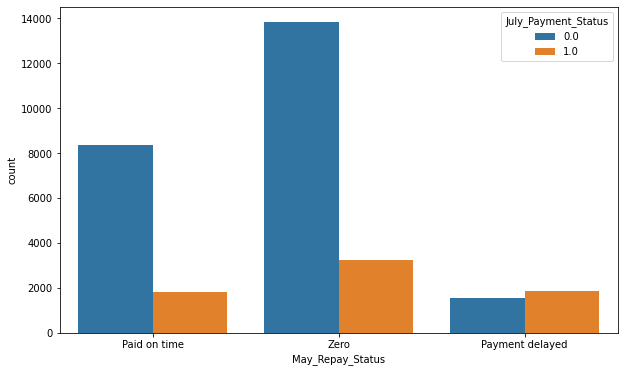

In [90]:
LABELS = ["Paid on time","Zero","Payment delayed"]
plt.figure(figsize=(10,6))
sns.countplot(x="May_Repay_Status",data=df, hue="July_Payment_Status")
plt.xticks(range(3), LABELS)

#### Jun_Repay_Status and July_Payment_Status

In [91]:
df['Jun_Repay_Status']=df['Jun_Repay_Status'].replace([-2],-1)
df['Jun_Repay_Status']=df['Jun_Repay_Status'].replace([1,3,4,5,6,7,8,9,10,11,12],2)

In [92]:
df[['Jun_Repay_Status', 'July_Payment_Status']].groupby("Jun_Repay_Status").mean()

,July_Payment_Status
Jun_Repay_Status,
-1.0,0.184631
0.0,0.188755
2.0,0.517409


In [93]:

df['Jun_Repay_Status']=df['Jun_Repay_Status'].replace([-1,0,2],[.184,.188,.517])

In [94]:
df['Jun_Repay_Status'].value_counts()

0.188    16381
0.184    10697
0.517     3504
Name: Jun_Repay_Status, dtype: int64

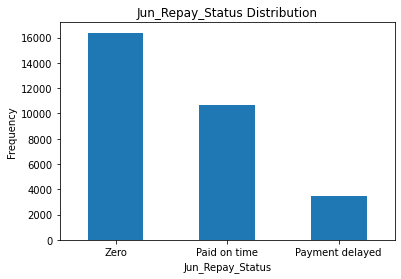

In [95]:
LABELS = ["Zero","Paid on time","Payment delayed"]

count_classes = pd.value_counts(df['Jun_Repay_Status'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Jun_Repay_Status Distribution")
plt.xticks(range(3), LABELS)
plt.xlabel("Jun_Repay_Status")
plt.ylabel("Frequency");

([<matplotlib.axis.XTick at 0x24bdab92550>,
 [Text(0, 0, 'Paid on time'),
  Text(0, 0, 'Zero'),
  Text(0, 0, 'Payment delayed')])

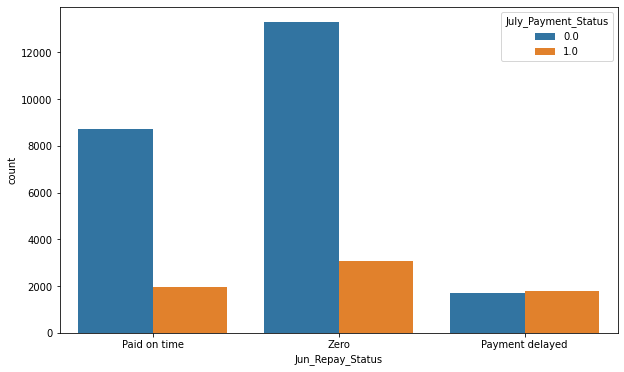

In [96]:
LABELS = ["Paid on time","Zero","Payment delayed"]
plt.figure(figsize=(10,6))
sns.countplot(x="Jun_Repay_Status",data=df, hue="July_Payment_Status")
plt.xticks(range(3), LABELS)

#### Statistiacal Analysis

In [97]:
July_Payment_Status_summary = df.groupby("July_Payment_Status")
July_Payment_Status_summary.mean().reset_index()

,July_Payment_Status,Credit_Limit,Sex,Education,Marital_Status,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,...,Mar_Statement,Apr_Repay_Status,Previous_Payment_Prior_Apr,Apr_Statement,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement
0,0.0,7100.260737,0.224720,0.223793,0.224364,35.671344,0.194253,263.188522,2086.291561,0.198632,...,1909.467287,0.206611,224.762174,1752.356227,0.207980,221.486009,1631.559291,0.210000,241.121313,1574.468282
1,1.0,5194.492326,0.226231,0.226822,0.224996,36.393993,0.330133,173.719647,1961.591952,0.313407,...,1832.938755,0.284755,159.221664,1705.260996,0.281516,162.268807,1612.100145,0.273549,178.252762,1571.503945


In [98]:
July_Payment_Status_summary = df.groupby("Sex")
July_Payment_Status_summary.mean().reset_index()

,Sex,Credit_Limit,Education,Marital_Status,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,Previous_Payment_Prior_Feb,...,Apr_Repay_Status,Previous_Payment_Prior_Apr,Apr_Statement,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement,July_Payment_Status
0,0.212,6773.339466,0.224788,0.224766,35.172710,0.222508,244.102685,1978.692510,0.220534,253.245183,...,0.221107,210.141244,1696.080938,0.221601,207.906737,1594.928197,0.222273,226.374326,1542.866509,0.211754
1,0.245,6516.066033,0.223995,0.224109,36.843456,0.228355,241.470049,2179.689029,0.230435,252.414759,...,0.228900,209.828807,1811.506511,0.228986,208.556738,1676.426436,0.227387,227.899296,1621.033144,0.245146


In [99]:
July_Payment_Status_summary = df.groupby("Marital_Status")
July_Payment_Status_summary.mean().reset_index()

,Marital_Status,Credit_Limit,Sex,Education,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,Previous_Payment_Prior_Feb,...,Apr_Repay_Status,Previous_Payment_Prior_Apr,Apr_Statement,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement,July_Payment_Status
0,0.215,6180.858358,0.225511,0.221066,32.252909,0.223111,243.060721,1991.981932,0.224145,249.123123,...,0.225085,207.050367,1691.092980,0.225908,211.259803,1575.541063,0.225827,229.221602,1532.965126,0.215378
1,0.236,7264.755851,0.224514,0.228594,40.163513,0.226890,243.060905,2138.344527,0.224825,257.502943,...,0.223111,213.605103,1803.021428,0.222849,204.420991,1689.617235,0.222446,224.265037,1623.174232,0.236565


#### Corolation

In [100]:
pd.DataFrame(abs(df.corr()['July_Payment_Status']).sort_values(ascending = False))

,July_Payment_Status
July_Payment_Status,1.000000
Jan_Repay_Status,0.368571
Feb_Repay_Status,0.338767
Mar_Repay_Status,0.297600
Apr_Repay_Status,0.279388
May_Repay_Status,0.271306
Jun_Repay_Status,0.251976
Credit_Limit,0.154052
Education,0.055369
Previous_Payment_Prior_Jan,0.053577


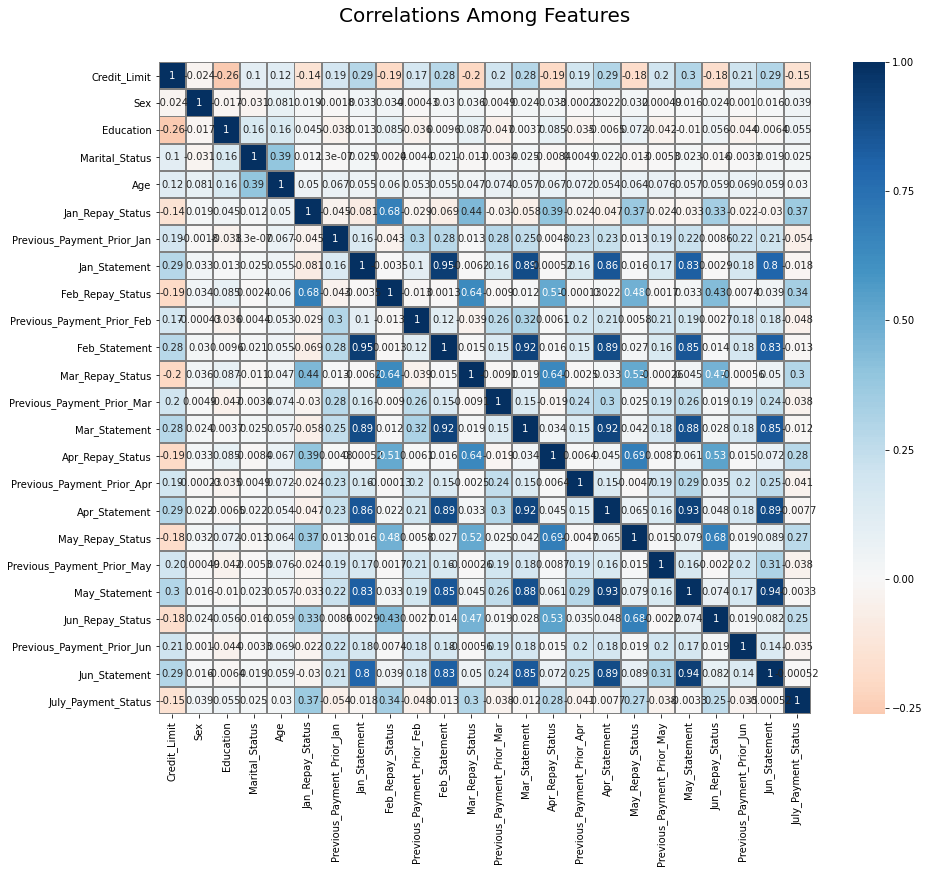

In [101]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (15,12))
sns.heatmap(df.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='gray',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

In [102]:
pd.set_option('display.max_columns',50)

##### Visualizing both classes using PCA

In [103]:
df['July_Payment_Status']=df['July_Payment_Status'].replace([0,1],[1,-1])

In [104]:
from sklearn.decomposition import PCA

In [105]:
pca=PCA(n_components=3)

In [106]:
df_pca=pca.fit_transform(df)

In [107]:
sum(pca.explained_variance_ratio_)

0.9306523686819332

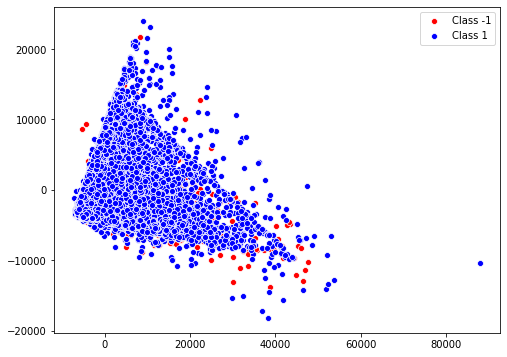

In [108]:
plt.figure(figsize=(8,6))
sns.scatterplot(df_pca[df['July_Payment_Status']==-1,0], df_pca[df['July_Payment_Status']==-1,1], color="r", label="Class -1")
sns.scatterplot(df_pca[df['July_Payment_Status']==1,0], df_pca[df['July_Payment_Status']==1,1], color="b", label="Class 1")

In [109]:
from sklearn.metrics import recall_score,f1_score,make_scorer, roc_auc_score, precision_score

In [110]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [111]:
def my_score(y_true,y_pred):
   
    return f1_score(y_true, y_pred, pos_label=-1)



score=make_scorer(my_score,greater_is_better=True)


I would like to use my majority class as an inliers and train my models based on just this class. The good models will be able to label the minority class as outliers.

In [112]:
inliers = df[df['July_Payment_Status']==1]

inliers = inliers.drop(['July_Payment_Status'], axis=1)

outliers = df[df['July_Payment_Status']==-1]


inliers_train, inliers_test = train_test_split(inliers, test_size=0.30, random_state=42)

inliers_train_y=df['July_Payment_Status'].loc[inliers_train.index]

#### Doing downsampling for train dataset in order to make our data balanced

In [113]:
from sklearn.utils import resample

inliers_train_df=pd.concat([inliers_train,inliers_train_y],axis=1)




inliers_train_new = resample(inliers_train_df, replace=False, 
                               n_samples=outliers.shape[0], 
                               random_state=42)


In [114]:
inliers_train_new.shape

(6880, 24)

In [115]:
outlier=outliers.July_Payment_Status

outliers = outliers.drop(['July_Payment_Status'], axis=1)

inliers_train = inliers_train_new.drop('July_Payment_Status', axis=1)
inliers_train_y = inliers_train_new['July_Payment_Status']


In [116]:
inliers_train.shape

(6880, 23)

## Modeling with use of Unsupervised Anomaly Detection Models

### IsolationForest

##### Finding hyperparameters using GridSearch

In [117]:
param_grid = {
   'n_estimators': [50, 100, 200],
    "max_samples":[50,100,200, "auto"], 
    "contamination":[0.1,0.2,0.3,0.4, 0.5, 'auto'],
    "bootstrap":[True, False]   
}


model_i = GridSearchCV(IsolationForest(), param_grid=param_grid, cv=5, scoring=score,n_jobs=-1)

model_i.fit(inliers_train, inliers_train_y)

model_i.best_score_

0.0

In [118]:
model_i=model_i.best_estimator_

In [119]:
model_i

IsolationForest(behaviour='deprecated', bootstrap=True, contamination=0.1,
                max_features=1.0, max_samples=50, n_estimators=50, n_jobs=None,
                random_state=None, verbose=0, warm_start=False)

In [120]:
scores_pred_i = model_i.decision_function(inliers_test)

inlier_pred_test_i = model_i.predict(inliers_test)

outlier_pred_i = model_i.predict(outliers)

In [121]:
y_tru=pd.concat([df['July_Payment_Status'].loc[inliers_test.index], outlier], axis=0) 

y_pred_i=list(inlier_pred_test_i)+list( outlier_pred_i)

print(classification_report(y_tru,y_pred_i))

              precision    recall  f1-score   support

        -1.0       0.74      0.29      0.42      6880
         1.0       0.57      0.90      0.70      7111

    accuracy                           0.60     13991
   macro avg       0.65      0.60      0.56     13991
weighted avg       0.65      0.60      0.56     13991



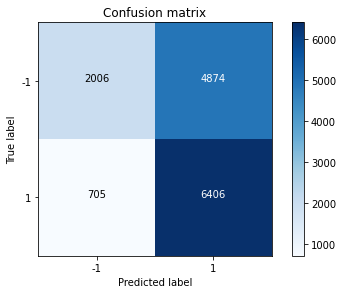

In [122]:
cnf_matrix = confusion_matrix(y_tru,y_pred_i)

class_names = [-1,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

##### Finding hyperparameter using Bayesian Optimization

In [123]:
bayes_cv_tuner = BayesSearchCV(
    estimator = IsolationForest(),
    search_spaces = {
    "n_estimators": Integer(50, 200),
    "max_samples":Integer(30,100),
    "max_features":Integer(1,3),
    "contamination":Real(0.01,0.2),
    "bootstrap":Categorical([True, False]),
    "verbose":Integer(0,3),
    "warm_start":Categorical([True, False])
    
    },    
    scoring = score,
    cv = StratifiedKFold(
        n_splits=3,
        shuffle=True,
        random_state=42
    ),
    n_jobs = -1,
    n_iter = 50,   
    verbose = 3,
    refit = True,
    random_state = 42
)

In [124]:
bayes_cv_tuner.fit(inliers_train.values,inliers_train_y.values)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.4s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.4s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.0s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.0s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.2s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.0s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.2s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.4s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.2s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.2s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.0s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.8s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.5s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.2s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.4s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.2s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.0s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.0s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.4s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.5s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.4s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


BayesSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
              error_score='raise',
              estimator=IsolationForest(behaviour='deprecated', bootstrap=False,
                                        contamination='auto', max_features=1.0,
                                        max_samples='auto', n_estimators=100,
                                        n_jobs=None, random_state=None,
                                        verbose=0, warm_start=False),
              fit_params=None, iid=True, n_iter=50, n_jobs=-1, n_points=1,
              opt...
                             'max_features': Integer(low=1, high=3, prior='uniform', transform='identity'),
                             'max_samples': Integer(low=30, high=100, prior='uniform', transform='identity'),
                             'n_estimators': Integer(low=50, high=200, prior='uniform', transform='identity'),
                             'verbose': Integer(low=0, high=3, prior='uniform', tr

In [125]:
model_I=bayes_cv_tuner.best_estimator_
model_I

IsolationForest(behaviour='deprecated', bootstrap=True,
                contamination=0.14826789120369177, max_features=3,
                max_samples=52, n_estimators=151, n_jobs=None,
                random_state=None, verbose=1, warm_start=True)

In [126]:
inlier_pred_test_I = model_I.predict(inliers_test.values)

outlier_pred_I = model_I.predict(outliers)

In [127]:
y_pred_I=list(inlier_pred_test_I)+list( outlier_pred_I)
print(classification_report(y_tru,y_pred_I))

              precision    recall  f1-score   support

        -1.0       0.66      0.31      0.42      6880
         1.0       0.56      0.85      0.67      7111

    accuracy                           0.58     13991
   macro avg       0.61      0.58      0.55     13991
weighted avg       0.61      0.58      0.55     13991



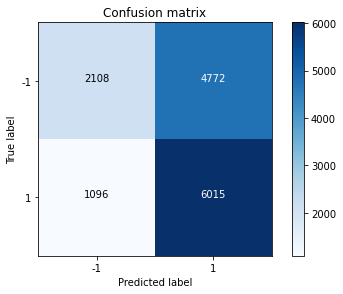

In [128]:
cnf_matrix = confusion_matrix(y_tru,y_pred_I)

class_names = [-1,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

In [129]:
roc_auc_score(y_tru,y_pred_I)

0.5761339702982278

### LocalOutlierFactor

In [130]:
from sklearn.neighbors import LocalOutlierFactor

##### Finding hyperparameters using GridSearch

In [131]:
param_grid = {
   "n_neighbors": [2,5,10],
   "algorithm" : ["ball_tree", 'kd_tree', 'brute'],
    "novelty": [True],
    "leaf_size":[20,30,40]
    
 }



model_l = GridSearchCV(LocalOutlierFactor(), param_grid, cv=2, scoring=score,n_jobs=-1)

model_l.fit(inliers_train, y=inliers_train_y)

model_l.best_score_

0.0

In [132]:
model_l=model_l.best_estimator_

In [133]:
model_l

LocalOutlierFactor(algorithm='ball_tree', contamination='auto', leaf_size=20,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=2, novelty=True, p=2)

In [134]:
inlier_pred_test_l = model_l.predict(inliers_test)

outlier_pred_l = model_l.predict(outliers)

In [135]:
y_pred_l=list(inlier_pred_test_l)+list( outlier_pred_l)

print(classification_report(y_tru,y_pred_l))

              precision    recall  f1-score   support

        -1.0       0.48      0.22      0.31      6880
         1.0       0.51      0.77      0.61      7111

    accuracy                           0.50     13991
   macro avg       0.49      0.50      0.46     13991
weighted avg       0.49      0.50      0.46     13991



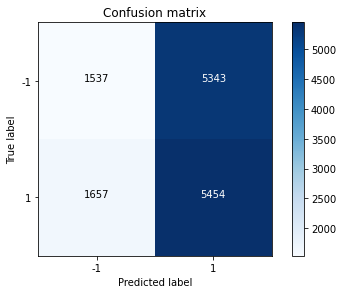

In [136]:
cnf_matrix = confusion_matrix(y_tru,y_pred_l)

class_names = [-1,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

##### Finding hyperparameter using Bayesian Optimization

In [137]:
bayes_cv_tuner = BayesSearchCV(
    estimator = LocalOutlierFactor(),
    search_spaces = {
    "n_neighbors": Integer(5,20),
    "algorithm" : Categorical(["ball_tree", 'kd_tree', 'brute']),
    "metric":Categorical(["euclidean", "manhattan","minkowski"]),
    "novelty": Categorical([True]),
    "leaf_size":Integer(5,30),
    "contamination":Real(0.1,0.2,0.3,0.5),
    "p":Integer(1,3)
    },    
    scoring = score,
    cv = StratifiedKFold(
        n_splits=3,
        shuffle=True,
        random_state=42
    ),
    n_jobs = -1,
    n_iter = 50,   
    verbose = 3,
    refit = True,
    random_state = 42
)


In [138]:
bayes_cv_tuner.fit(inliers_train.values,inliers_train_y.values)


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   48.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.2s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.2s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.0s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.2s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   42.9s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.5s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.5s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.7s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.8s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.2s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.9s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.8s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.4s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.5s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.8s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.0s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   46.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.4s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.9s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.3s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.7s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.2s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.2s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.2s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.4s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.0s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.4s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.0s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.3s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.5s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.4s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   48.4s finished


BayesSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
              error_score='raise',
              estimator=LocalOutlierFactor(algorithm='auto',
                                           contamination='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=20, novelty=False, p=2),
              fit_params=None, iid=True, n_iter=50, n_jobs=-1, n_points=1,
              optimizer_kwargs=None, pre_dispatch='...
                             'leaf_size': Integer(low=5, high=30, prior='uniform', transform='identity'),
                             'metric': Categorical(categories=('euclidean', 'manhattan', 'minkowski'), prior=None),
                             'n_neighbors': Integer(low=5, high=20, prior='uniform', transform='identity'),
                             'novelty': Categorical(categories=(True,

In [139]:
model_L=bayes_cv_tuner.best_estimator_
model_L

LocalOutlierFactor(algorithm='kd_tree', contamination=0.16560264815415385,
                   leaf_size=28, metric='euclidean', metric_params=None,
                   n_jobs=None, n_neighbors=15, novelty=True, p=2)

In [140]:
inlier_pred_test_L = model_L.predict(inliers_test.values)

outlier_pred_L = model_L.predict(outliers)

In [141]:
y_pred_L=list(inlier_pred_test_L)+list( outlier_pred_L)
print(classification_report(y_tru,y_pred_L))

              precision    recall  f1-score   support

        -1.0       0.46      0.14      0.22      6880
         1.0       0.50      0.84      0.63      7111

    accuracy                           0.50     13991
   macro avg       0.48      0.49      0.42     13991
weighted avg       0.48      0.50      0.43     13991



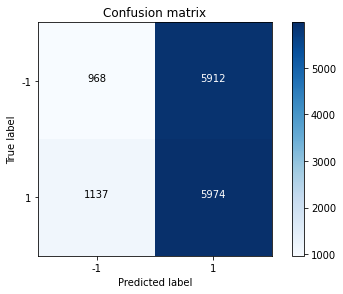

In [142]:
cnf_matrix = confusion_matrix(y_tru,y_pred_L)

class_names = [-1,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

In [143]:
roc_auc_score(y_tru,y_pred_L)

0.4904022755442763

### OneClassSVM

##### Finding hyperparameters using GridSearch

In [144]:
from sklearn.svm import OneClassSVM

param_grid = {
   "kernel": ['poly', 'rbf'],
    "degree" : list(range(1,8,1)),
    "nu":[ 0.4, 0.5,0.6],
    "gamma":['auto','scale'],
    "tol":[0.001,0.01],
    "coef0":[0,0.001]
}


model_s = GridSearchCV(OneClassSVM(), param_grid= param_grid, cv=3, scoring=score,n_jobs=-1)

model_s.fit(inliers_train,inliers_train_y)

model_s.best_score_

0.0

In [145]:
model_s=model_s.best_estimator_

In [146]:
model_s

OneClassSVM(cache_size=200, coef0=0, degree=1, gamma='auto', kernel='poly',
            max_iter=-1, nu=0.4, shrinking=True, tol=0.001, verbose=False)

In [147]:
inlier_pred_test_s = model_s.predict(inliers_test)

outlier_pred_s = model_s.predict(outliers)

In [148]:
y_pred_s=list(inlier_pred_test_s)+list( outlier_pred_s)
print(classification_report(y_tru,y_pred_s))

              precision    recall  f1-score   support

        -1.0       0.57      0.55      0.56      6880
         1.0       0.58      0.59      0.59      7111

    accuracy                           0.57     13991
   macro avg       0.57      0.57      0.57     13991
weighted avg       0.57      0.57      0.57     13991



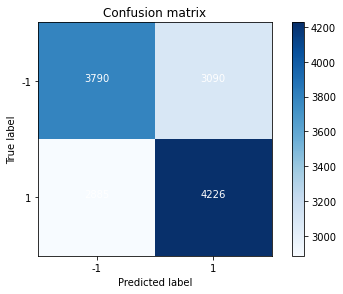

In [149]:
cnf_matrix = confusion_matrix(y_tru,y_pred_s)

class_names = [-1,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

##### Finding hyperparameter using Bayesian Optimization

In [150]:
bayes_cv_tuner = BayesSearchCV(estimator =OneClassSVM(),
search_spaces = {

"kernel":Categorical(['linear', 'poly', 'rbf', 'sigmoid']),
"gamma":Categorical(['scale','auto']),
'degree': Integer(1,5),
'coef0': Real(0.01, 1.0)
},
scoring = score,
cv = StratifiedKFold(
n_splits=5,
shuffle=True,
random_state=42
),
n_jobs = -1,
n_iter = 50,
verbose = 0,
refit = True,
random_state = 42
)



In [151]:
bayes_cv_tuner.fit(inliers_train.values,inliers_train_y.values)


BayesSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
              error_score='raise',
              estimator=OneClassSVM(cache_size=200, coef0=0.0, degree=3,
                                    gamma='scale', kernel='rbf', max_iter=-1,
                                    nu=0.5, shrinking=True, tol=0.001,
                                    verbose=False),
              fit_params=None, iid=True, n_iter=50, n_jobs=-1, n_points=1,
              optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state...
              refit=True, return_train_score=False,
              scoring=make_scorer(my_score),
              search_spaces={'coef0': Real(low=0.01, high=1.0, prior='uniform', transform='identity'),
                             'degree': Integer(low=1, high=5, prior='uniform', transform='identity'),
                             'gamma': Categorical(categories=('scale', 'auto'), prior=None),
                             'kernel': Categorical(categories=('li

In [152]:
model_S=bayes_cv_tuner.best_estimator_
model_S

OneClassSVM(cache_size=200, coef0=0.4160029192647807, degree=4, gamma='auto',
            kernel='poly', max_iter=-1, nu=0.5, shrinking=True, tol=0.001,
            verbose=False)

In [153]:
inlier_pred_test_S = model_S.predict(inliers_test.values)

outlier_pred_S = model_S.predict(outliers)

In [154]:
y_pred_S=list(inlier_pred_test_S)+list( outlier_pred_S)
print(classification_report(y_tru,y_pred_S))

              precision    recall  f1-score   support

        -1.0       0.55      0.64      0.59      6880
         1.0       0.59      0.50      0.54      7111

    accuracy                           0.57     13991
   macro avg       0.57      0.57      0.57     13991
weighted avg       0.57      0.57      0.57     13991



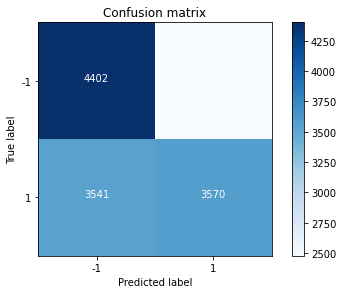

In [155]:
cnf_matrix = confusion_matrix(y_tru,y_pred_S)

class_names = [-1,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

In [156]:
roc_auc_score(y_tru,y_pred_S)

0.570932337878099

### EllipticEnvelope

##### Finding hyperparameters using GridSearch

In [157]:
from sklearn.covariance import EllipticEnvelope


param_grid = {
   "store_precision": [True,False],
    
    "assume_centered" : [True, False],
    
    "support_fraction": [0.1, 0.4, 0.7, None],
    
    "contamination":[0.1,0.5]
}

model_e = GridSearchCV(EllipticEnvelope(), param_grid, cv=3, scoring=score,n_jobs=-1)

model_e.fit(inliers_train,inliers_train_y)

model_e.best_score_

0.0

In [158]:
model_e=model_e.best_estimator_

In [159]:
model_e

EllipticEnvelope(assume_centered=True, contamination=0.1, random_state=None,
                 store_precision=True, support_fraction=0.1)

In [160]:
inlier_pred_test_e = model_e.predict(inliers_test)

outlier_pred_e = model_e.predict(outliers)

In [161]:
y_pred_e=list(inlier_pred_test_e)+list( outlier_pred_e)

print(classification_report(y_tru,y_pred_e))

              precision    recall  f1-score   support

        -1.0       0.40      0.07      0.12      6880
         1.0       0.50      0.90      0.64      7111

    accuracy                           0.49     13991
   macro avg       0.45      0.48      0.38     13991
weighted avg       0.45      0.49      0.38     13991



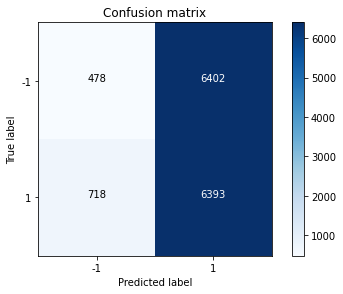

In [162]:
cnf_matrix = confusion_matrix(y_tru,y_pred_e)

class_names = [-1,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

In [163]:
roc_auc_score(y_tru,y_pred_e)

0.4842532082623384

##### Finding hyperparameter using Bayesian Optimization

In [164]:
bayes_cv_tuner = BayesSearchCV(estimator =EllipticEnvelope(),
search_spaces = {
    
    "store_precision": Categorical([True,False]),
    
    "assume_centered" : Categorical([True, False]),
    
    "support_fraction": Real(0.001,0.9),
    
    "contamination":Real(0.01,0.5)
},
scoring = score,
cv = StratifiedKFold(
n_splits=5,
shuffle=True,
random_state=42
),
n_jobs = -1,
n_iter = 50,
verbose = 0,
refit = True,
random_state = 42
)



In [165]:
bayes_cv_tuner.fit(inliers_train.values,inliers_train_y.values)

BayesSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
              error_score='raise',
              estimator=EllipticEnvelope(assume_centered=False,
                                         contamination=0.1, random_state=None,
                                         store_precision=True,
                                         support_fraction=None),
              fit_params=None, iid=True, n_iter=50, n_jobs=-1, n_points=1,
              optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=42,
              refit=Tru...lse,
              scoring=make_scorer(my_score),
              search_spaces={'assume_centered': Categorical(categories=(True, False), prior=None),
                             'contamination': Real(low=0.01, high=0.5, prior='uniform', transform='identity'),
                             'store_precision': Categorical(categories=(True, False), prior=None),
                             'support_fraction': Real(low=0.001, high=0.9, pri

In [166]:
model_E=bayes_cv_tuner.best_estimator_

In [167]:
model_E

EllipticEnvelope(assume_centered=True, contamination=0.3665856141568893,
                 random_state=None, store_precision=False,
                 support_fraction=0.2849038345448568)

In [168]:
inlier_pred_test_E = model_E.predict(inliers_test.values)

outlier_pred_E = model_E.predict(outliers)

In [169]:
y_pred_E=list(inlier_pred_test_E)+list( outlier_pred_E)

print(classification_report(y_tru,y_pred_E))

              precision    recall  f1-score   support

        -1.0       0.65      0.69      0.67      6880
         1.0       0.68      0.64      0.66      7111

    accuracy                           0.66     13991
   macro avg       0.66      0.66      0.66     13991
weighted avg       0.66      0.66      0.66     13991



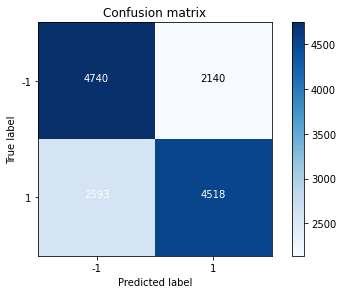

In [170]:
cnf_matrix = confusion_matrix(y_tru,y_pred_E)

class_names = [-1,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

In [171]:
roc_auc_score(y_tru,y_pred_E)

0.6621535828866512

In the next step, I am using both classes for train the model and we can see the result of both methods.

#### Splitting the data

In [172]:
X=df.drop('July_Payment_Status',axis=1)
y=df['July_Payment_Status']

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [174]:
df1=pd.concat([X_train,y_train],axis=1)

minority_class = df1[df1['July_Payment_Status'] == -1]
majority_class = df1[df1['July_Payment_Status'] == 1]


majority_downsample = resample(majority_class, replace=False, 
                               n_samples=minority_class.shape[0], 
                               random_state=42)

df2 = pd.concat([majority_downsample, minority_class])

In [175]:
X_train_ds = df2.drop('July_Payment_Status', axis=1)
y_train_ds = df2['July_Payment_Status']

###  Isolation Forest Training on Both Classes

In [176]:
def my_f1(y_true, y_pred):
    return f1_score(y_true, y_pred, pos_label=-1)

my_f1= make_scorer(my_f1, greater_is_better=True)


def my_roc_auc(y_true, y_pred):
    return roc_auc_score(y_true, y_pred)

my_roc_auc=make_scorer(my_roc_auc, greater_is_better=True)

##### Finding hyperparameters using GridSearch

In [177]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_samples":[30,50,100,"auto"],
    "max_features":[1,2,3],
    "contamination":[0.01,0.1,0.2, 'auto'],
    "bootstrap":[True, False],
    "verbose":[0,1,2],
    "warm_start":[True, False]
}


model_i_grid = GridSearchCV(IsolationForest(), param_grid=param_grid,
                    cv=StratifiedKFold(n_splits=2, shuffle=True),
                    scoring=my_roc_auc, n_jobs=-1)

model_i_grid.fit(X_train_ds, y=y_train_ds)

model_i_grid.best_score_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished


0.5555440199335548

In [178]:
model_ii=model_i_grid.best_estimator_

In [179]:
model_ii

IsolationForest(behaviour='deprecated', bootstrap=True, contamination='auto',
                max_features=3, max_samples=30, n_estimators=200, n_jobs=None,
                random_state=None, verbose=1, warm_start=True)

In [180]:
y_pred_test_ii = model_ii.predict(X_test)

In [181]:
print(classification_report(y_test,y_pred_test_ii))

              precision    recall  f1-score   support

        -1.0       0.27      0.45      0.34      2064
         1.0       0.80      0.64      0.71      7111

    accuracy                           0.60      9175
   macro avg       0.54      0.55      0.52      9175
weighted avg       0.68      0.60      0.63      9175



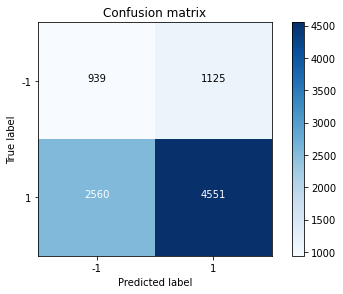

In [182]:
cnf_matrix = confusion_matrix(y_test,y_pred_test_ii)

class_names = [-1,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

In [183]:
roc_auc_score(y_test,y_pred_test_ii)

0.5474681176886121

##### Finding hyperparameter using Bayesian Optimization

In [184]:
bayes_cv_tuner = BayesSearchCV(
    estimator = IsolationForest(),
    search_spaces = {
    "n_estimators": Integer(50, 200),
    "max_samples":Integer(30,100),
    "max_features":Integer(1,3),
    "contamination":Real(0.01,0.2),
    "bootstrap":Categorical([True, False]),
    "verbose":Integer(0,3),
    "warm_start":Categorical([True, False])
    
    },    
    scoring = 'roc_auc',
    cv = StratifiedKFold(
        n_splits=3,
        shuffle=True,
        random_state=42
    ),
    n_jobs = 3,
    n_iter = 10,   
    verbose = 3,
    refit = True,
    random_state = 42
)


In [185]:
bayes_cv_tuner.fit(X_train_ds.values, y_train_ds.values)


model_II=bayes_cv_tuner.best_estimator_


y_pred_II=model_II.predict(X_test.values)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    2.4s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.8s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.6s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.4s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.8s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.5s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.4s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.9s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


In [186]:
print(classification_report(y_test,y_pred_II))

              precision    recall  f1-score   support

        -1.0       0.25      0.15      0.19      2064
         1.0       0.78      0.87      0.82      7111

    accuracy                           0.71      9175
   macro avg       0.52      0.51      0.51      9175
weighted avg       0.66      0.71      0.68      9175



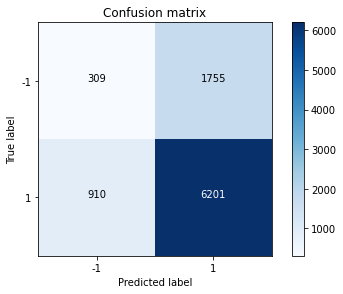

In [187]:
cnf_matrix = confusion_matrix(y_test,y_pred_II)

class_names = [-1,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

In [188]:
roc_auc_score(y_test,y_pred_II)

0.5108692763913099

### Local Outlier Factor training on both class

In [189]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold

##### Finding hyperparameters using GridSearch

In [190]:
param_grid = {
   "n_neighbors": [10,20,30],
    "algorithm" : ['auto','ball_tree', 'kd_tree', 'brute'],
    "metric":['euclidean', 'minkowski', 'manhattan'],
    "contamination":[0.1,0.3,0.4],
    "novelty": [True]
    }



modelGrid_ll = GridSearchCV(LocalOutlierFactor(), param_grid=param_grid,
                    cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2),
                       scoring=my_f1, n_jobs=-1)

modelGrid_ll.fit(X_train_ds, y=y_train_ds)

modelGrid_ll.best_score_

0.3844279396928565

In [191]:
model_ll=modelGrid_ll.best_estimator_

In [192]:
model_ll

LocalOutlierFactor(algorithm='auto', contamination=0.4, leaf_size=30,
                   metric='euclidean', metric_params=None, n_jobs=None,
                   n_neighbors=10, novelty=True, p=2)

In [193]:
model_ll_pred_test = model_ll.predict(X_test)

In [194]:
print(classification_report(y_test,model_ll_pred_test))

              precision    recall  f1-score   support

        -1.0       0.18      0.34      0.24      2064
         1.0       0.75      0.56      0.64      7111

    accuracy                           0.51      9175
   macro avg       0.46      0.45      0.44      9175
weighted avg       0.62      0.51      0.55      9175



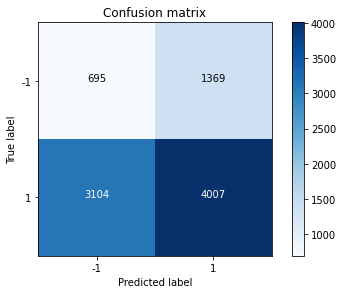

In [195]:
cnf_matrix = confusion_matrix(y_test,model_ll_pred_test)

class_names = [-1,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

In [196]:
roc_auc_score(y_test,model_ll_pred_test)

0.4501089928912407

##### Finding hyperparameter using Bayesian Optimization

In [197]:
bayes_cv_tuner = BayesSearchCV(
    estimator = LocalOutlierFactor(),
    search_spaces = {
    "n_neighbors": Integer(5,20),
    "algorithm" : Categorical(["ball_tree", 'kd_tree', 'brute']),
    "metric":Categorical(["euclidean", "manhattan","minkowski"]),
    "novelty": Categorical([True]),
    "leaf_size":Integer(5,30),
    "contamination":Real(0.1,0.2,0.3,0.5),
    "p":Integer(1,3)
    },    
    scoring = 'roc_auc',
    cv = StratifiedKFold(
        n_splits=3,
        shuffle=True,
        random_state=42
    ),
    n_jobs = -1,
    n_iter = 10,   
    verbose = 3,
    refit = True,
    random_state = 42
)


In [198]:
bayes_cv_tuner.fit(X_train_ds.values, y_train_ds.values)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   50.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.2s finished


BayesSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
              error_score='raise',
              estimator=LocalOutlierFactor(algorithm='auto',
                                           contamination='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=20, novelty=False, p=2),
              fit_params=None, iid=True, n_iter=10, n_jobs=-1, n_points=1,
              optimizer_kwargs=None, pre_dispatch='...
                             'leaf_size': Integer(low=5, high=30, prior='uniform', transform='identity'),
                             'metric': Categorical(categories=('euclidean', 'manhattan', 'minkowski'), prior=None),
                             'n_neighbors': Integer(low=5, high=20, prior='uniform', transform='identity'),
                             'novelty': Categorical(categories=(True,

In [199]:
model=bayes_cv_tuner.best_estimator_


y_pred_LO=model.predict(X_test.values)

In [200]:
print(classification_report(y_test,y_pred_LO))

              precision    recall  f1-score   support

        -1.0       0.19      0.17      0.18      2064
         1.0       0.77      0.80      0.78      7111

    accuracy                           0.65      9175
   macro avg       0.48      0.48      0.48      9175
weighted avg       0.64      0.65      0.64      9175



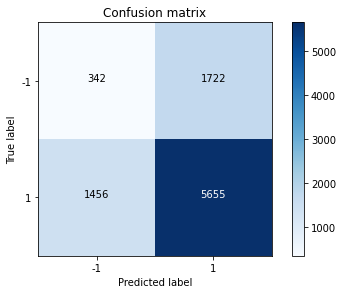

In [201]:
cnf_matrix = confusion_matrix(y_test,y_pred_LO)

class_names = [-1,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

In [202]:
roc_auc_score(y_test,y_pred_LO)

0.48047223757493307

### One Class SVM training on both class

##### Finding hyperparameters using GridSearch

In [203]:
param_grid = {
   "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
    "degree" : [2,3,4],
    "gamma":['auto','scale'],
    "coef0":[0.001,0.01]
}


modelGrid_svm2 = GridSearchCV(OneClassSVM(), param_grid= param_grid,
                        cv=StratifiedKFold(n_splits=5, shuffle=True),
                        scoring=my_roc_auc,n_jobs=-1)

modelGrid_svm2.fit(X_train_ds,y_train_ds)

modelGrid_svm2.best_score_

0.5739179517672557

In [204]:
model_svm2=modelGrid_svm2.best_estimator_

In [205]:
model_svm2

OneClassSVM(cache_size=200, coef0=0.001, degree=2, gamma='scale',
            kernel='sigmoid', max_iter=-1, nu=0.5, shrinking=True, tol=0.001,
            verbose=False)

In [206]:
model_svm2_pred = model_svm2.predict(X_test)

In [207]:
print(classification_report(y_test,model_svm2_pred))

              precision    recall  f1-score   support

        -1.0       0.28      0.56      0.37      2064
         1.0       0.82      0.58      0.68      7111

    accuracy                           0.57      9175
   macro avg       0.55      0.57      0.52      9175
weighted avg       0.70      0.57      0.61      9175



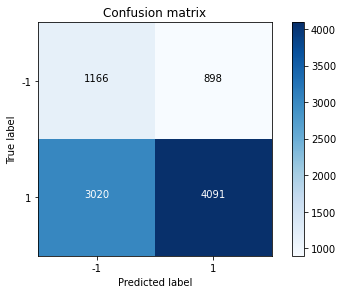

In [208]:
cnf_matrix = confusion_matrix(y_test,model_svm2_pred)

class_names = [-1,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

In [209]:
roc_auc_score(y_test,model_svm2_pred)

0.5701141723871412

##### Finding hyperparameter using Bayesian Optimization

In [210]:
bayes_cv_tuner = BayesSearchCV(estimator =OneClassSVM(),
search_spaces = {

"kernel":Categorical(['linear', 'poly', 'rbf', 'sigmoid']),
"gamma":Categorical(['scale','auto']),
'degree': Integer(1,5),
'coef0': Real(0.01, 1.0)
},
scoring = 'roc_auc',
cv = StratifiedKFold(
n_splits=5,
shuffle=True,
random_state=42
),
n_jobs = -1,
n_iter = 10,
verbose = 0,
refit = True,
random_state = 42
)






In [211]:
bayes_cv_tuner.fit(X_train_ds.values, y_train_ds.values)


model=bayes_cv_tuner.best_estimator_


y_pred_sv=model.predict(X_test.values)

In [212]:
print(classification_report(y_test,y_pred_sv))

              precision    recall  f1-score   support

        -1.0       0.28      0.56      0.37      2064
         1.0       0.82      0.58      0.68      7111

    accuracy                           0.57      9175
   macro avg       0.55      0.57      0.52      9175
weighted avg       0.70      0.57      0.61      9175



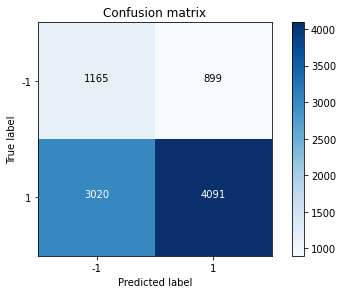

In [213]:
cnf_matrix = confusion_matrix(y_test,y_pred_sv)

class_names = [-1,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

In [214]:
roc_auc_score(y_test,y_pred_sv)

0.5698719243251258

### Elliptic Envelope training on Both Classes

##### Finding hyperparameters using GridSearch

In [215]:
param_grid = {
   "store_precision": [True,False],
    
    "assume_centered" : [True, False],
    
    "support_fraction": [0.001, 0.01, 0.1, 0.5,0.9, None],
    
    "contamination":[0.01,0.1,0.3,0.5]
}

grid_ee = GridSearchCV(EllipticEnvelope(), param_grid=param_grid,
                    cv=StratifiedKFold(n_splits=5, shuffle=True),
                    scoring=my_f1, n_jobs=-1)

grid_ee.fit(X_train_ds,y_train_ds)


grid_ee.best_score_

0.6042896799970856

In [216]:
model_ee=grid_ee.best_estimator_

In [217]:
model_ee

EllipticEnvelope(assume_centered=False, contamination=0.5, random_state=None,
                 store_precision=False, support_fraction=0.1)

In [218]:
model_ee_pred_test = model_ee.predict(X_test)

In [219]:
print(classification_report(y_test,model_ee_pred_test))

              precision    recall  f1-score   support

        -1.0       0.36      0.67      0.47      2064
         1.0       0.87      0.66      0.75      7111

    accuracy                           0.66      9175
   macro avg       0.62      0.66      0.61      9175
weighted avg       0.76      0.66      0.69      9175



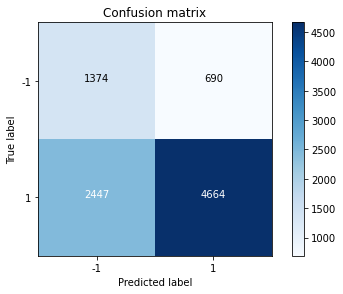

In [220]:
cnf_matrix = confusion_matrix(y_test,model_ee_pred_test)

class_names = [-1,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

In [221]:
roc_auc_score(y_test,model_ee_pred_test)

0.660791461312804

##### Finding hyperparameter using Bayesian Optimization

In [222]:
bayes_cv_tuner = BayesSearchCV(estimator =EllipticEnvelope(),
search_spaces = {
    
    "store_precision": Categorical([True,False]),
    
    "assume_centered" : Categorical([True, False]),
    
    "support_fraction": Real(0.001,0.9),
    
    "contamination":Real(0.01,0.5)
},
scoring = 'roc_auc',
cv = StratifiedKFold(
n_splits=5,
shuffle=True,
random_state=42
),
n_jobs = -1,
n_iter = 10,
verbose = 0,
refit = True,
random_state = 42
)

In [223]:
bayes_cv_tuner.fit(X_train_ds.values, y_train_ds.values)


BayesSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
              error_score='raise',
              estimator=EllipticEnvelope(assume_centered=False,
                                         contamination=0.1, random_state=None,
                                         store_precision=True,
                                         support_fraction=None),
              fit_params=None, iid=True, n_iter=10, n_jobs=-1, n_points=1,
              optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=42,
              refit=Tru...ain_score=False, scoring='roc_auc',
              search_spaces={'assume_centered': Categorical(categories=(True, False), prior=None),
                             'contamination': Real(low=0.01, high=0.5, prior='uniform', transform='identity'),
                             'store_precision': Categorical(categories=(True, False), prior=None),
                             'support_fraction': Real(low=0.001, high=0.9, prior='uniform', 

In [224]:
model_EE=bayes_cv_tuner.best_estimator_


In [225]:
model_EE

EllipticEnvelope(assume_centered=False, contamination=0.3533045078644693,
                 random_state=None, store_precision=False,
                 support_fraction=0.37482315773392877)

In [226]:
y_pred_EE=model_EE.predict(X_test.values)

In [227]:
print(classification_report(y_test,y_pred_EE))

              precision    recall  f1-score   support

        -1.0       0.46      0.51      0.48      2064
         1.0       0.85      0.82      0.84      7111

    accuracy                           0.75      9175
   macro avg       0.66      0.67      0.66      9175
weighted avg       0.76      0.75      0.76      9175



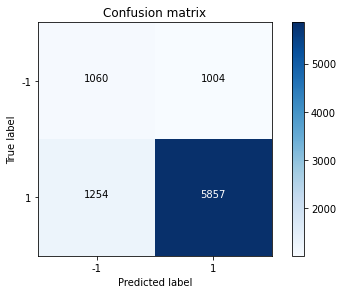

In [228]:
cnf_matrix = confusion_matrix(y_test,y_pred_EE)

class_names = [-1,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

In [229]:
roc_auc_score(y_test,y_pred_EE)

0.6686096930293606